In [7]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 19

@author: yaning
"""

import pickle
# import torch
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import pandas as pd

In [2]:
path = "/home/yaning/Documents/"
with open(path + "Spiking_add_files/validation_not_9.pkl", "rb") as f:
    maps_not_9 = pickle.load(f)

In [3]:
path = "/home/yaning/Documents/"
with open(path + "Spiking_add_files/validation_9.pkl", "rb") as f:
    maps_9 = pickle.load(f)

Text(0, 0.5, 'E layer activities')

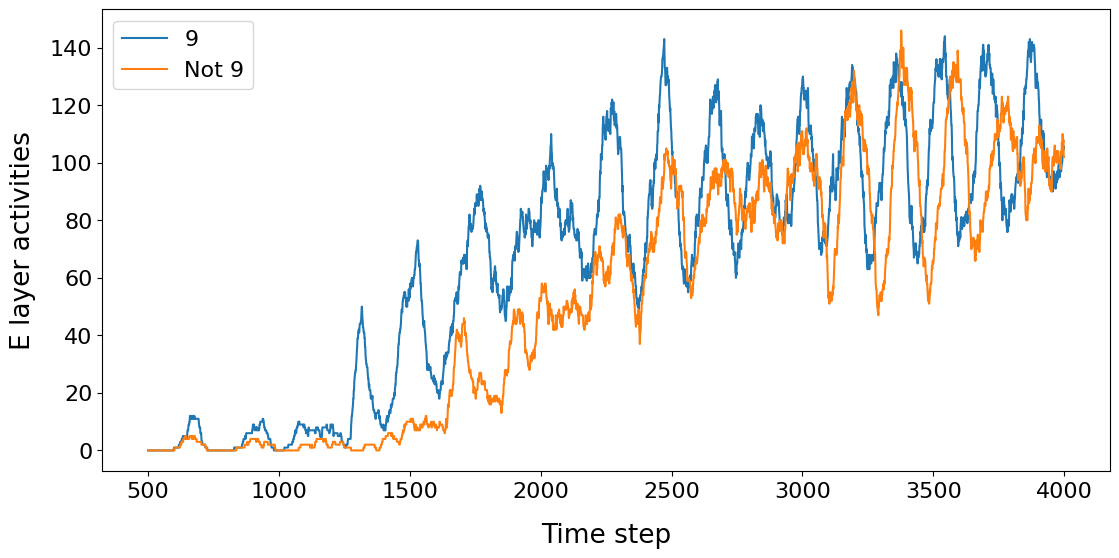

In [8]:
times = np.arange(0,4000)
plt.figure(figsize=(13, 6))
font_size = 16

plt.plot(times[500:], maps_9[1]["sum_E"][500:], label='9')
plt.plot(times[500:], maps_not_9[1]["sum_E"][500:], label='Not 9')
# plt.plot(times, sum_six.cpu()[500:])
plt.legend(fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.xlabel('Time step', fontsize=font_size+3, labelpad=15)
plt.ylabel('E layer activities', fontsize=font_size+3, labelpad=10)
# plt.savefig('EEG.png', dpi=300, bbox_inches='tight')

In [9]:
first_not_9 = []
for i in maps_not_9:
    first_not_9.append(i["first_peak_index"])

In [10]:
first_9 = []
for i in maps_9:
    first_9.append(i["first_peak_index"])

In [11]:
first_9 = np.array(first_9)

In [13]:
np.sum(first_9 > 1500) / first_9.size -1

np.float64(-0.631578947368421)

In [17]:
np.sum(first_not_9 > 1500) / first_not_9.size

np.float64(0.8936170212765957)

In [18]:
(np.sum(first_9 <= 1500) + np.sum(first_not_9 > 1500)) / (first_9.size + first_not_9.size)

np.float64(0.7619047619047619)

In [125]:
first_9.shape

(95,)

In [15]:
first_not_9 = np.array(first_not_9)

In [127]:
first_not_9.shape

(94,)

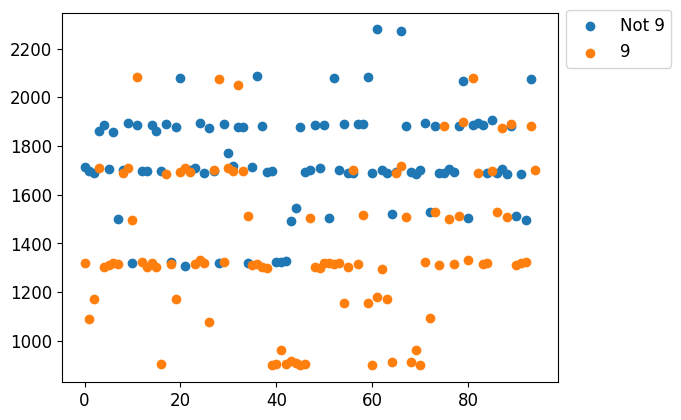

In [ ]:
label_size = 12

plt.scatter(np.arange(0,first_not_9.shape[0]), first_not_9, label="Not 9")
plt.scatter(np.arange(0,first_9.shape[0]), first_9, label="9")
plt.tick_params(labelsize=label_size)
plt.xlabel("")
plt.legend(fontsize=label_size, loc='upper left', bbox_to_anchor=(1, 1.03))

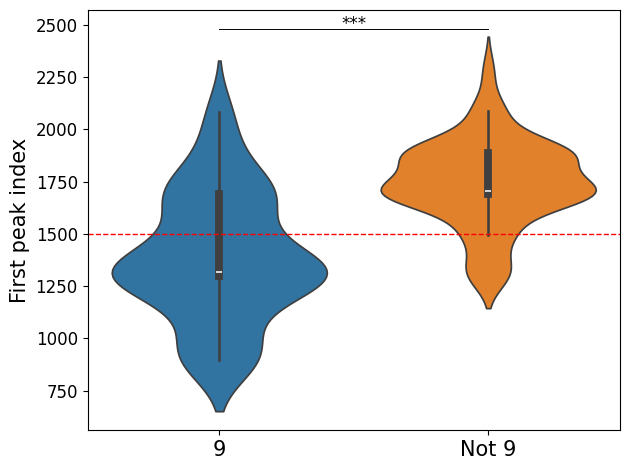

In [215]:
label_size = 12

data = [first_9, first_not_9]
sns.violinplot(data)

plt.tick_params(labelsize=label_size)
plt.xticks([0,1],['9', 'Not 9'], fontsize=label_size+3)
plt.ylabel('First peak index', fontsize=label_size+3)
plt.axhline(y = 1500, color="red", linestyle="--", linewidth=1)

y_max = max(max(first_9), max(first_not_9)) + 200
plt.plot([0, 1], [y_max, y_max], color='black', linewidth=0.7)

# Add significance asterisk
plt.text(0.5, y_max + 0.1, "***", ha='center', fontsize=label_size)

plt.tight_layout()
plt.savefig("plots/SO_first.png", dpi= 300)

In [176]:
sum_9 = np.array(sum_9)
sum_not_9 = np.array(sum_not_9)

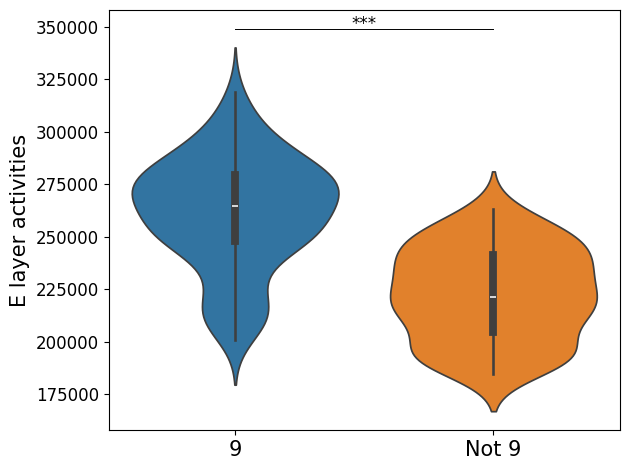

In [214]:
label_size = 12

data = [sum_9, sum_not_9]
sns.violinplot(data)

plt.tick_params(labelsize=label_size)
plt.xticks([0,1],['9', 'Not 9'], fontsize=label_size+3)
plt.ylabel('E layer activities', fontsize=label_size+3)
# plt.axhline(y = 1500, color="red", linestyle="--", linewidth=1)

y_max = max(max(sum_9), max(sum_not_9)) + 30000
plt.plot([0, 1], [y_max, y_max], color='black', linewidth=0.7)

# Add significance asterisk
plt.text(0.5, y_max + 0.1, "***", ha='center', fontsize=label_size)

plt.tight_layout()
plt.savefig("plots/SO_sum.png", dpi= 300)

In [24]:
np.mean(first_not_9 > 1500)

np.float64(0.8936170212765957)

In [30]:
np.mean(first_9 <= 1500)

np.float64(0.631578947368421)

In [3]:
len(maps)

95

In [168]:
sum_not_9 = []
for i in maps_not_9:
    sum_not_9.append(i["sum_E"].sum())

In [169]:
sum_9 = []
for i in maps_9:
    sum_9.append(i["sum_E"].sum())

In [34]:
sum_9 = np.array(sum_9)

In [35]:
sum_not_9 = np.array(sum_not_9)

In [40]:
np.sum(sum_not_9, axis=-1).shape

(94,)

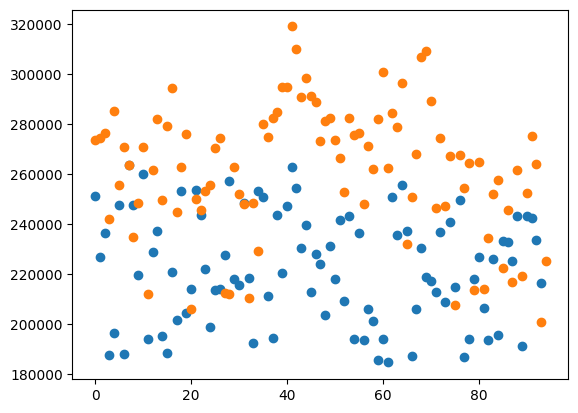

In [41]:
plt.scatter(np.arange(0,94), np.sum(sum_not_9, axis=-1))
plt.scatter(np.arange(0,95), np.sum(sum_9, axis=-1))

In [195]:
from scipy.stats import mannwhitneyu

u_sum, p_sum = mannwhitneyu(sum_9, sum_not_9, alternative='two-sided')

In [196]:
u_first, p_first = mannwhitneyu(first_9, first_not_9, alternative='two-sided')

In [197]:
print(u_sum)
print(p_sum)
print(u_first)
print(p_first)

7737.0
3.309617959510848e-18
1583.5
1.825938667479358e-14


In [199]:
first_9.shape[0]*first_not_9.shape[0]

8930

In [200]:
sum_9.shape[0]*sum_not_9.shape[0]

8930

In [54]:
from scipy.stats import ttest_ind

t, p = ttest_ind(sum_9, sum_not_9, equal_var=False)  # Welch's t-test

/home/yaning/.conda/envs/spike/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:618: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


In [4]:
maps[0].keys()

dict_keys(['sum_E', 'first_peak_index', 'map'])

In [5]:
maps[0]["first_peak_index"]

np.int64(1320)

In [5]:
times = np.arange(4000)

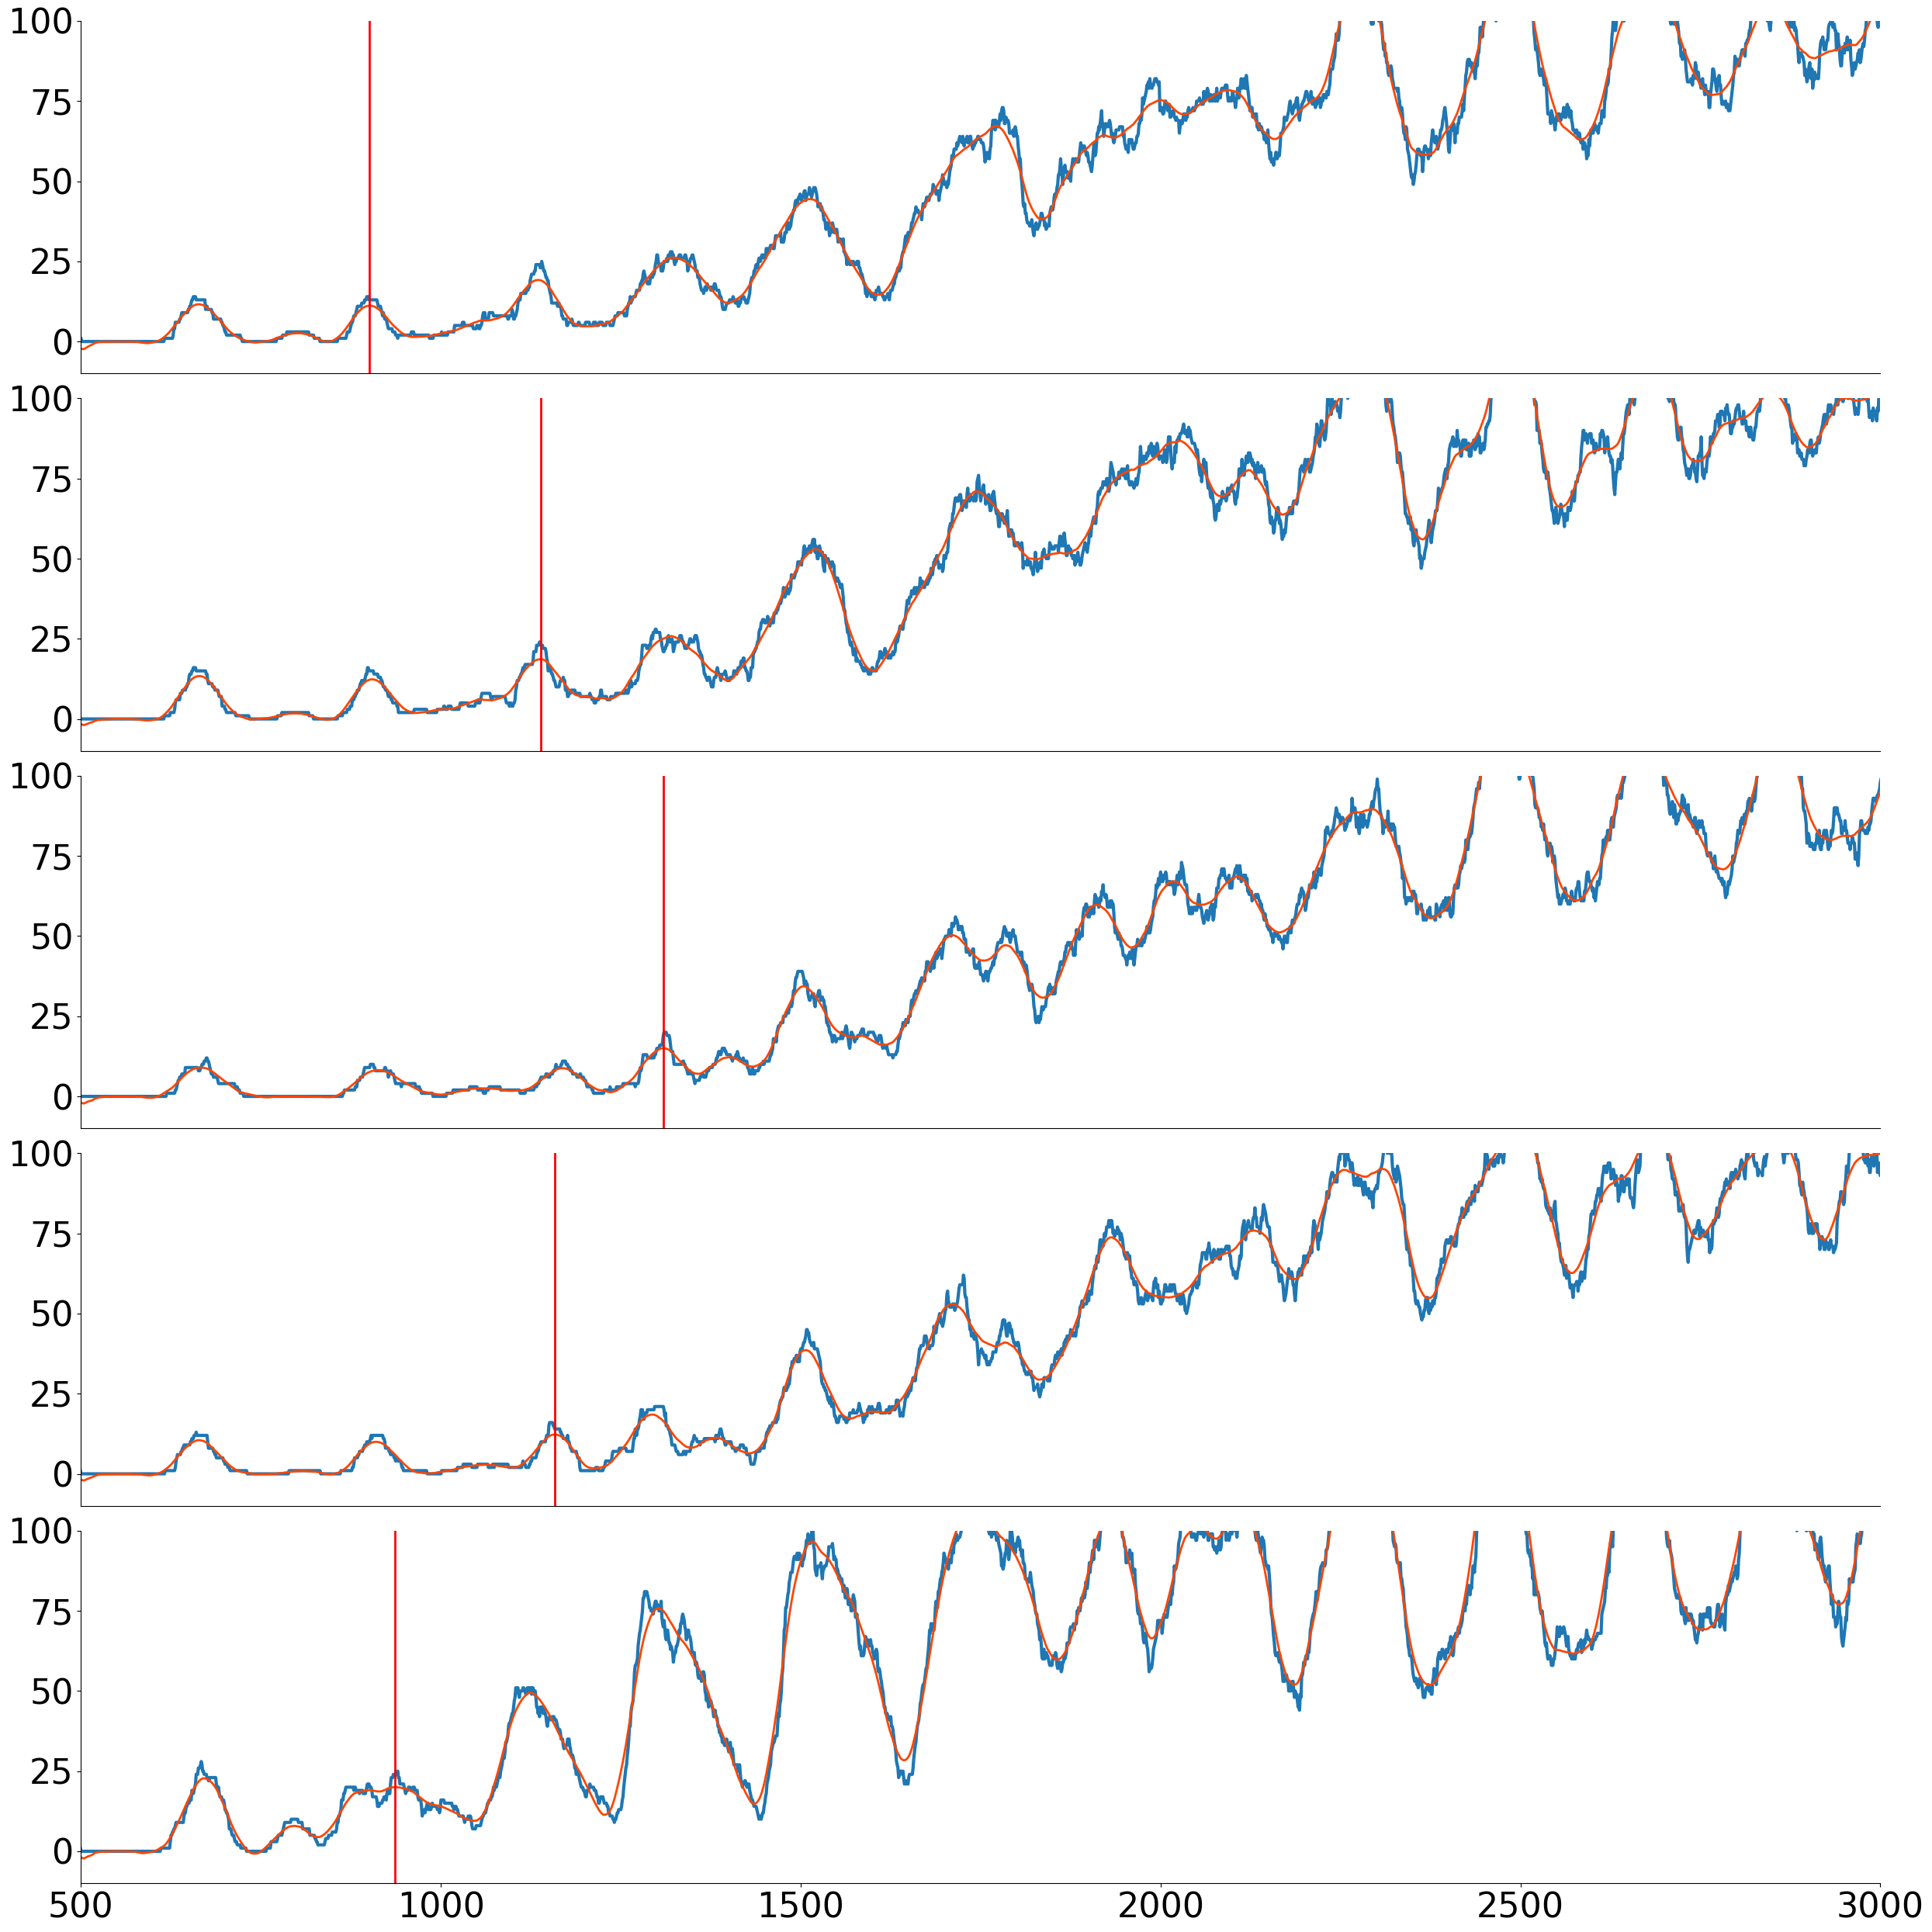

In [ ]:
fig, axes = plt.subplots(5,1, figsize=(25,25))
axes = axes.flatten()
from scipy.signal import savgol_filter
label_size = 32

for i in range(5):
    axes[i].plot(times, maps[i]["sum_E"], linewidth=3)

    smoothed = savgol_filter(maps[i]["sum_E"], window_length=101, polyorder=3)
    axes[i].plot(times, smoothed, color="orangered", linewidth = 2)
    axes[i].axvline(x=maps[i]["first_peak_index"], color="red", linewidth=2)
    # axes[i].plot(times[:3000], maps[i]["ratio"])
    axes[i].set_xlim(500, 3000)
    axes[i].set_ylim(-10,100)
    axes[i].spines["top"].set_visible(False)
    axes[i].spines["right"].set_visible(False)
    axes[i].tick_params(labelsize= label_size)
    # axes[i].set_xlabel("")

    if i != 4:
        axes[i].tick_params(bottom=False, labelbottom=False)


plt.tight_layout()
# plt.savefig("plots/first_peak_index.png", dpi= 300)
plt.show()

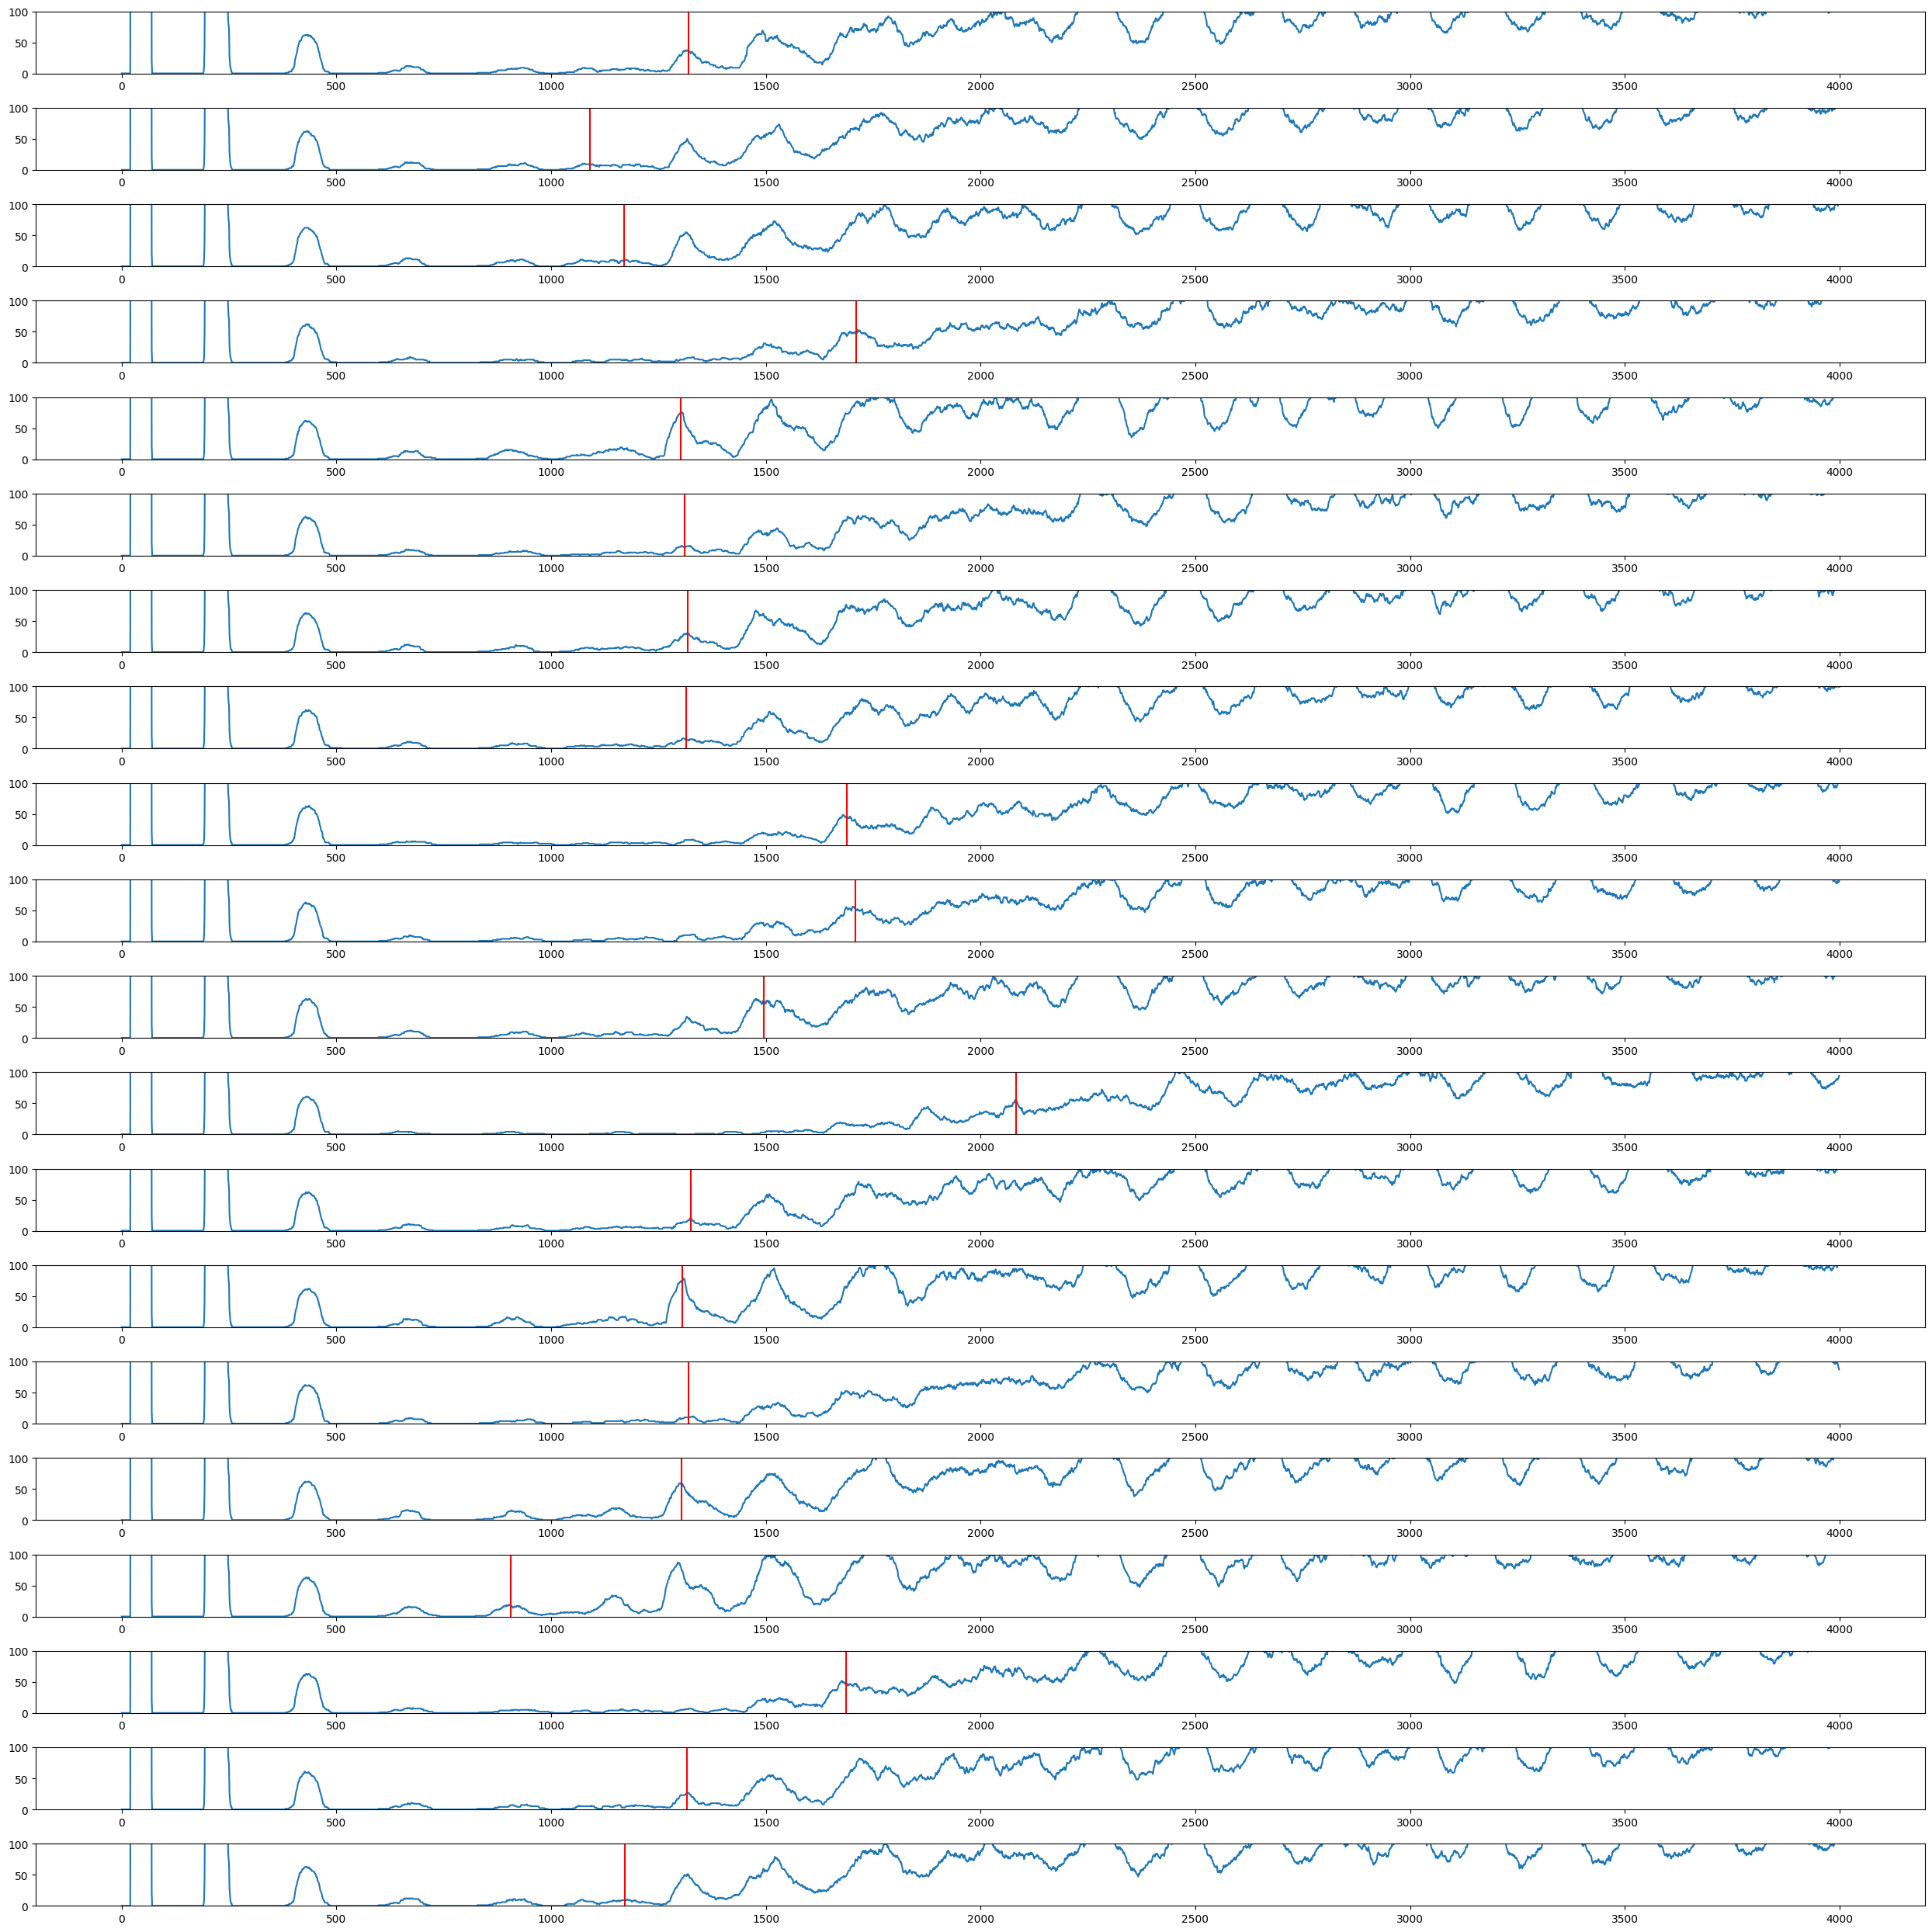

In [ ]:
fig, axes = plt.subplots(20,1, figsize=(25,25))
axes = axes.flatten()

for i in range(20):
    axes[i].plot(times, maps[i]["sum_E"])
    # axes[i].plot(times, maps[i]["length_sizes"])
    axes[i].axvline(x=maps[i]["first_peak_index"], color="red")
    # axes[i].plot(times[:3000], maps[i]["ratio"])
    axes[i].set_ylim(0,100)

plt.tight_layout()
plt.show()

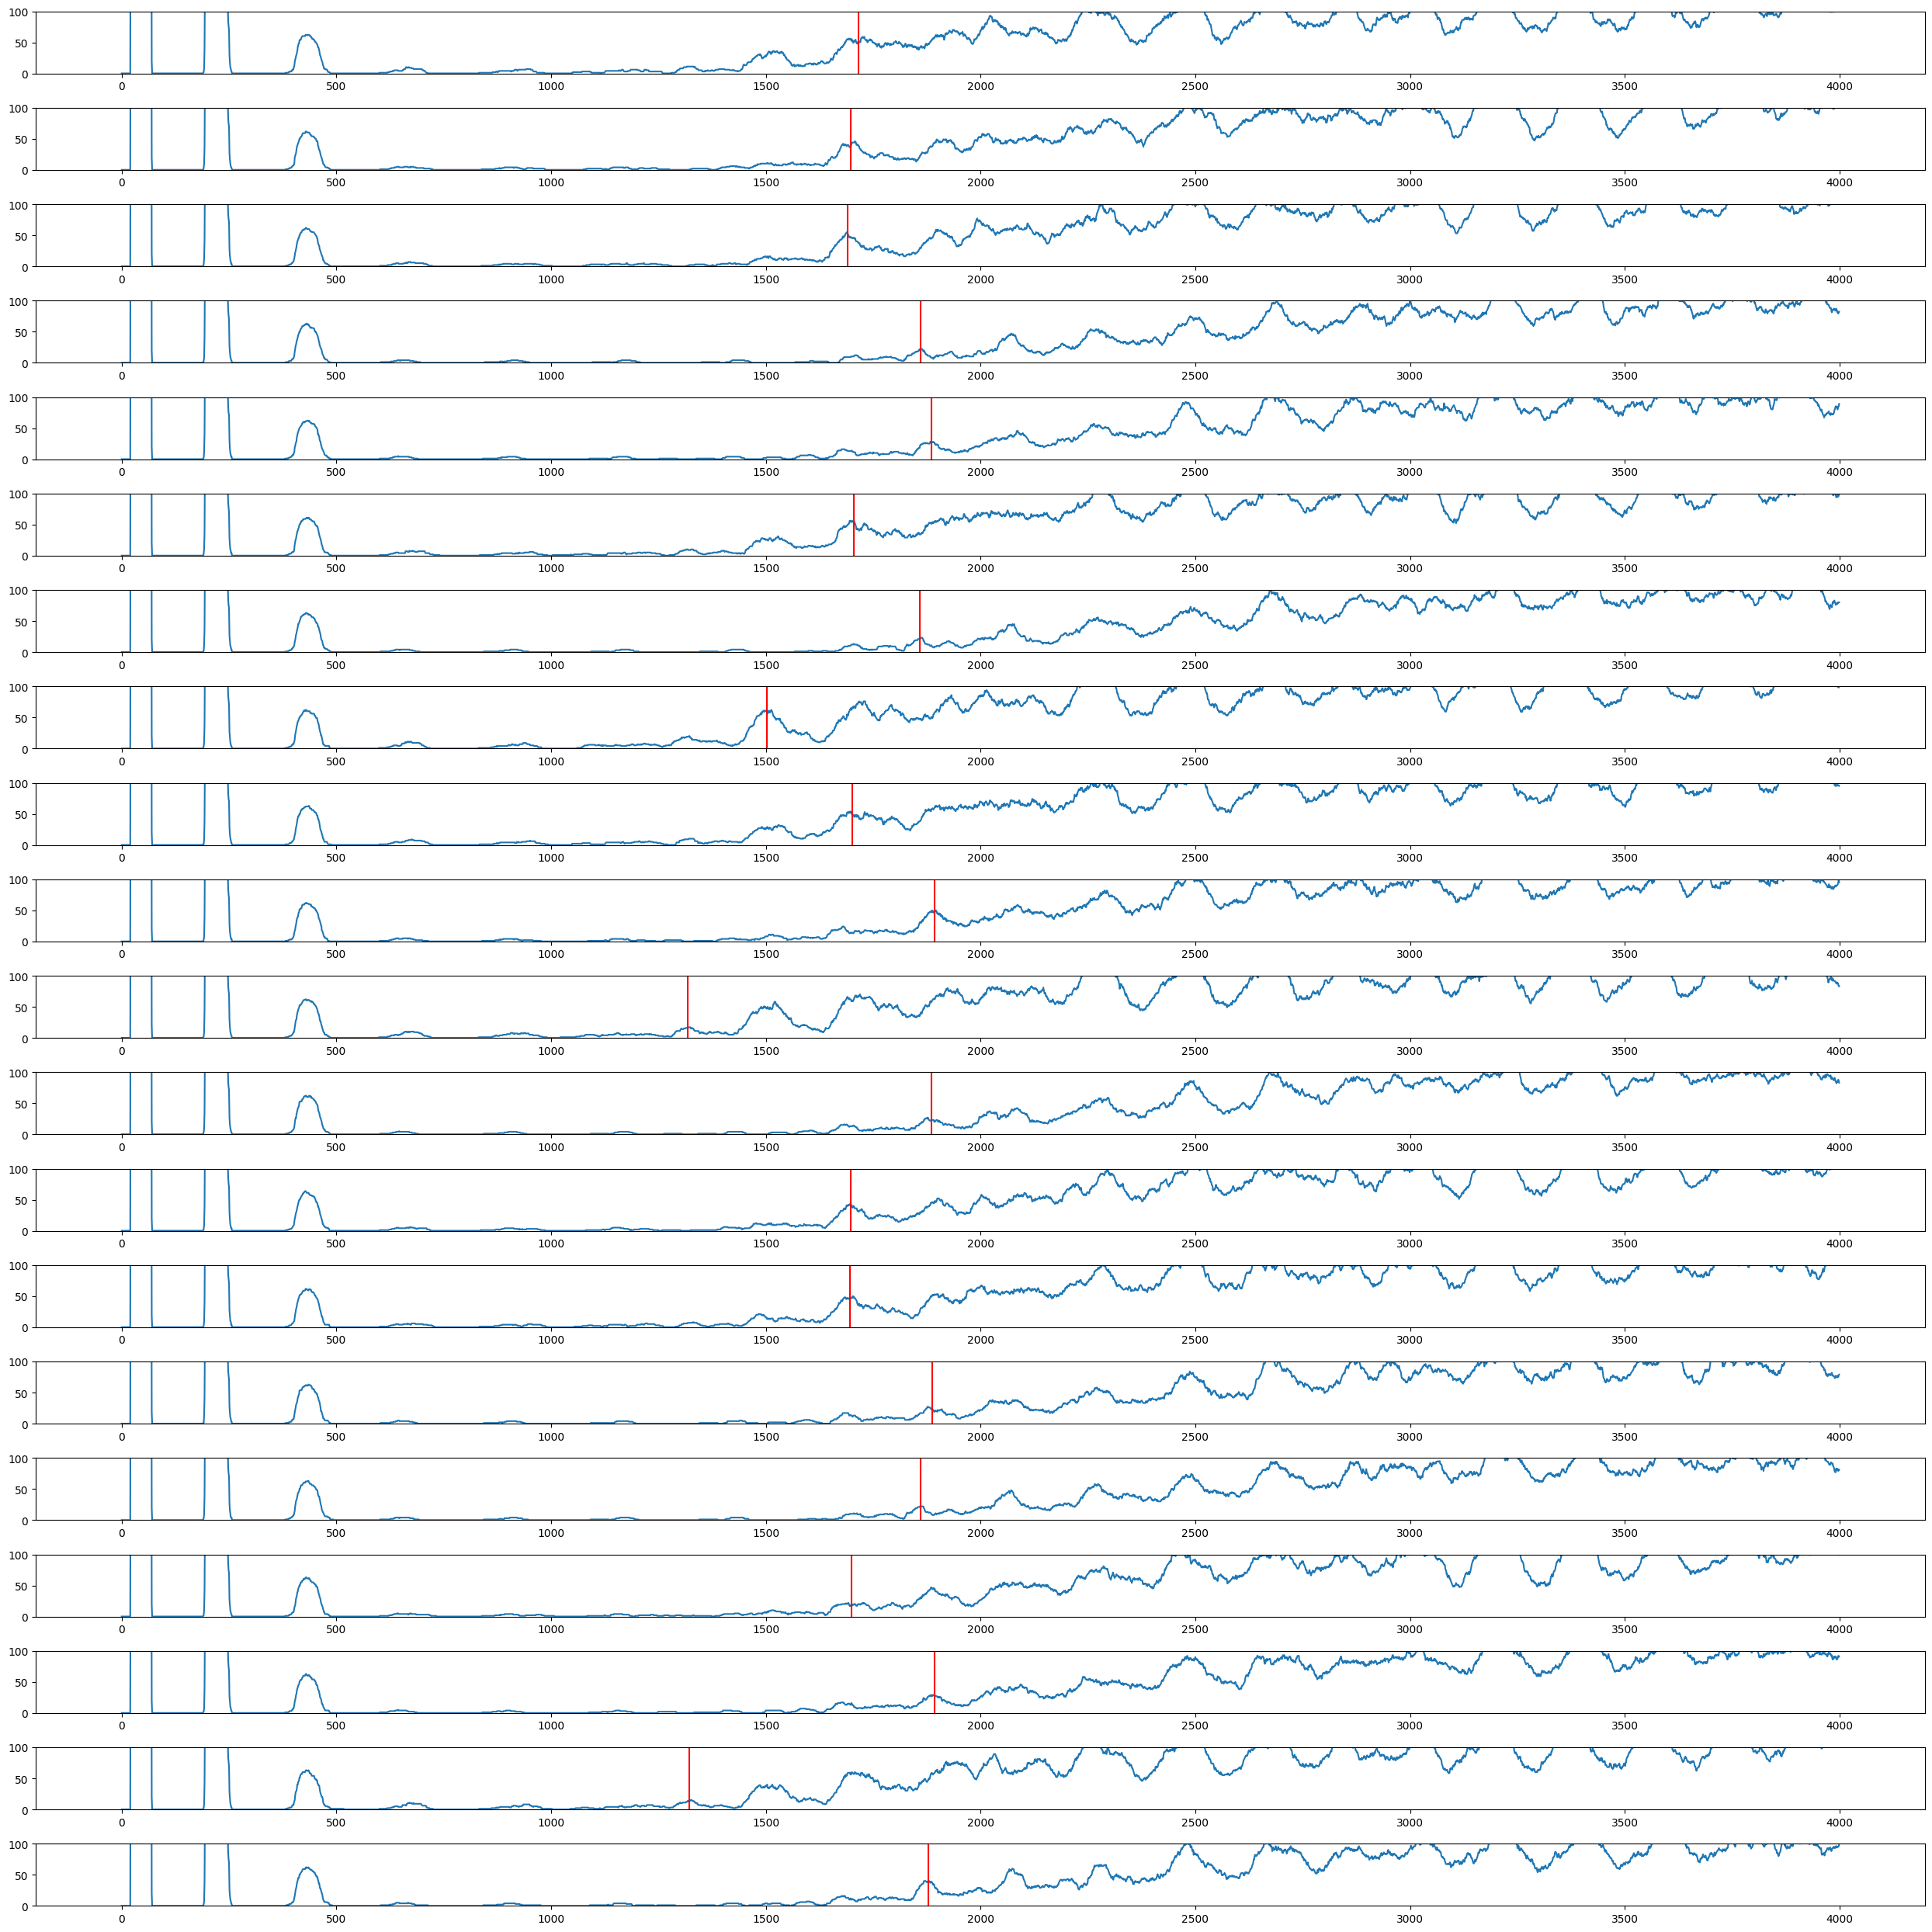

In [9]:
fig, axes = plt.subplots(20,1, figsize=(25,25))
axes = axes.flatten()

for i in range(20):
    axes[i].plot(times, maps[i]["sum_E"])
    # axes[i].plot(times, maps[i]["length_sizes"])
    axes[i].axvline(x=maps[i]["first_peak_index"], color="red")
    # axes[i].plot(times[:3000], maps[i]["ratio"])
    axes[i].set_ylim(0,100)

plt.tight_layout()
plt.show()

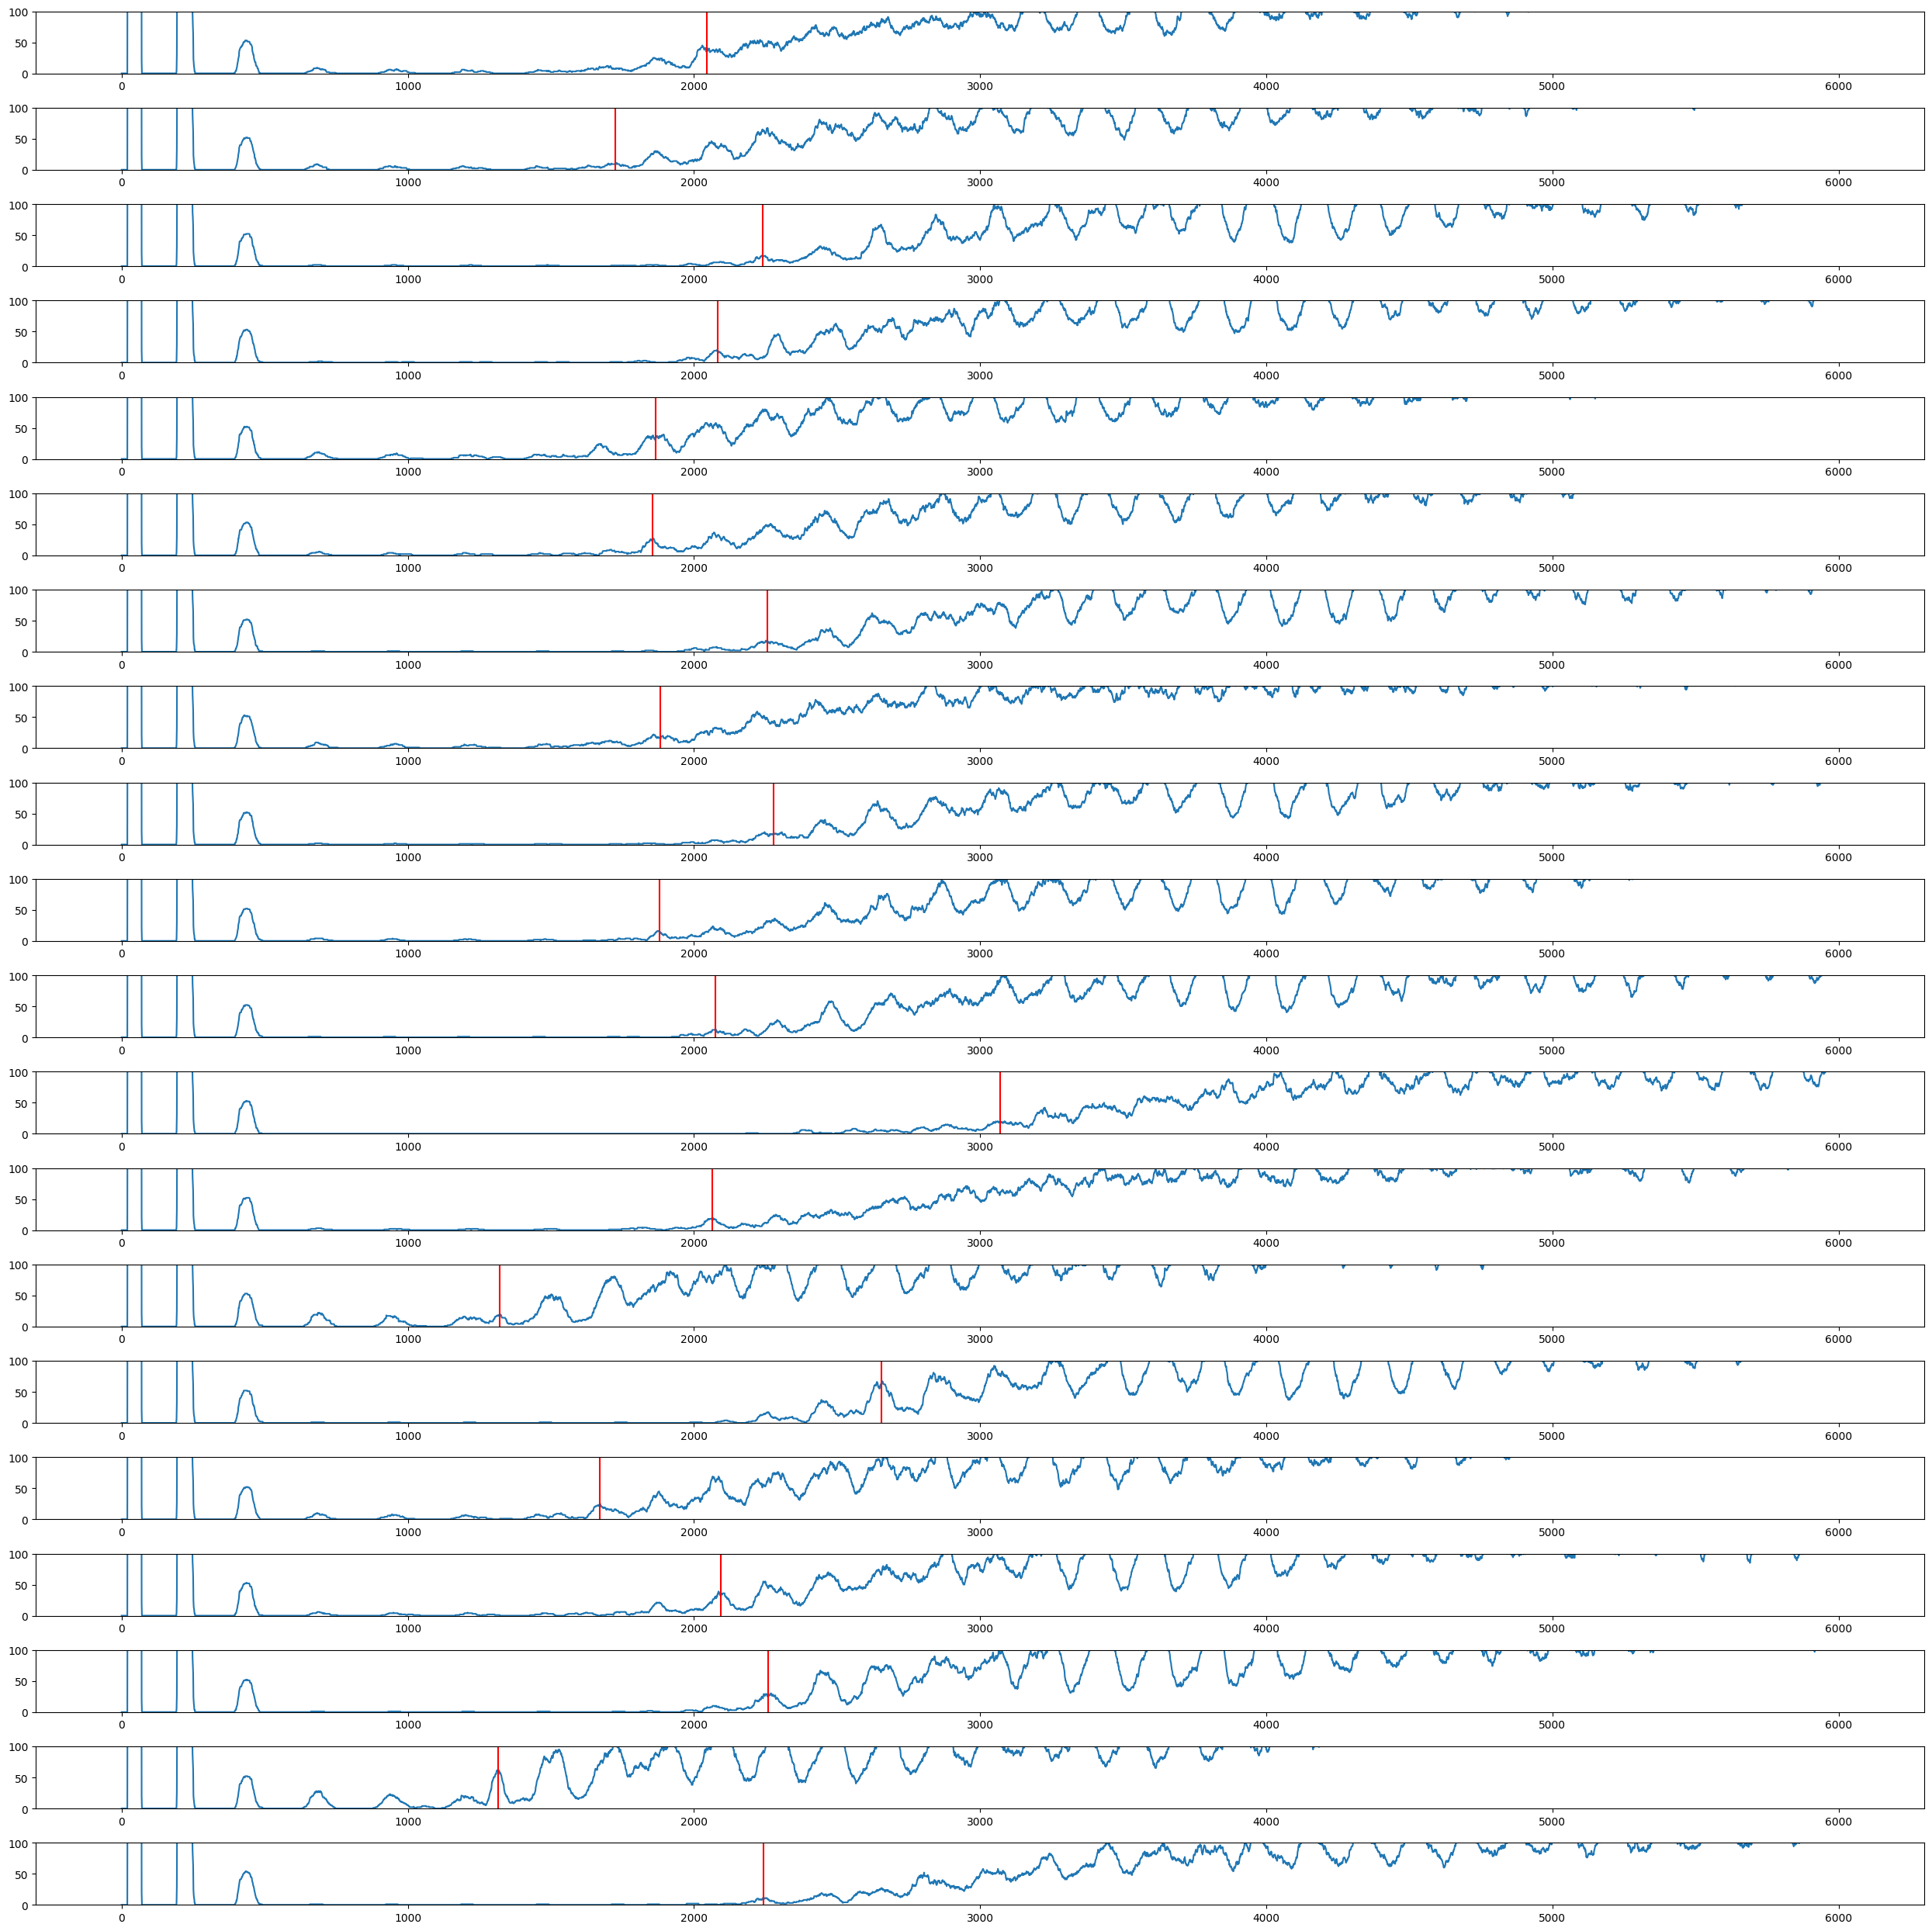

In [16]:
fig, axes = plt.subplots(20,1, figsize=(25,25))
axes = axes.flatten()

for i in range(20):
    axes[i].plot(times, maps[i]["sum_E"])
    # axes[i].plot(times, maps[i]["length_sizes"])
    axes[i].axvline(x=maps[i]["first_peak_index"], color="red")
    # axes[i].plot(times[:3000], maps[i]["ratio"])
    axes[i].set_ylim(0,100)

plt.tight_layout()
plt.show()

In [9]:
num = 0
missing_idx = []
with open("validation_5_freq_output.log", "r") as f:
    for line in f:
        clean_line = line.strip()
        if clean_line == "Progress: 0/6000 (0.0%)":
            num += 1
        elif clean_line == "oops":
            missing_idx.append(num)

In [10]:
num

100

In [36]:
missing_idx

[9, 14, 21, 34, 51, 66, 83, 86, 91, 93]

In [34]:
for i in range(len(missing_idx)):
    missing_idx[i] = missing_idx[i] - 1

In [35]:
len(maps)

90

In [37]:
with open(path + "Spiking_NN/datasets/mnst_30_-100_0_3_5.pkl", "rb") as f:
    tags = pickle.load(f)

In [38]:
tags = tags['tag']

In [15]:
tags.shape

(100,)

In [39]:
tags = np.delete(tags, missing_idx)

In [ ]:
# binary_maps = []
# for i in maps:
#     temp = (i["map"] != 0).astype(int)
#     binary_maps.append(temp)

In [ ]:
# from matplotlib.colors import ListedColormap
# cmap = ListedColormap([plt.cm.YlGnBu(0.0), plt.cm.YlGnBu(0.8)])

In [44]:
# only get the nines and zeros
zero_idx = np.where(tags == 0)[0]
three_idx = np.where(tags == 3)[0]
nine_idx = np.where(tags == 5)[0]

In [19]:
five_idx.shape

(27,)

In [18]:
zero_maps = []
for i in zero_idx:
    zero_maps.append(maps[i]["map"])

In [19]:
three_maps = []
for i in three_idx:
    three_maps.append(maps[i]["map"])

In [45]:
nine_maps = []
for i in nine_idx:
    nine_maps.append(maps[i]["map"])

In [23]:
len(zero_maps)

31

In [24]:
len(maps)

90

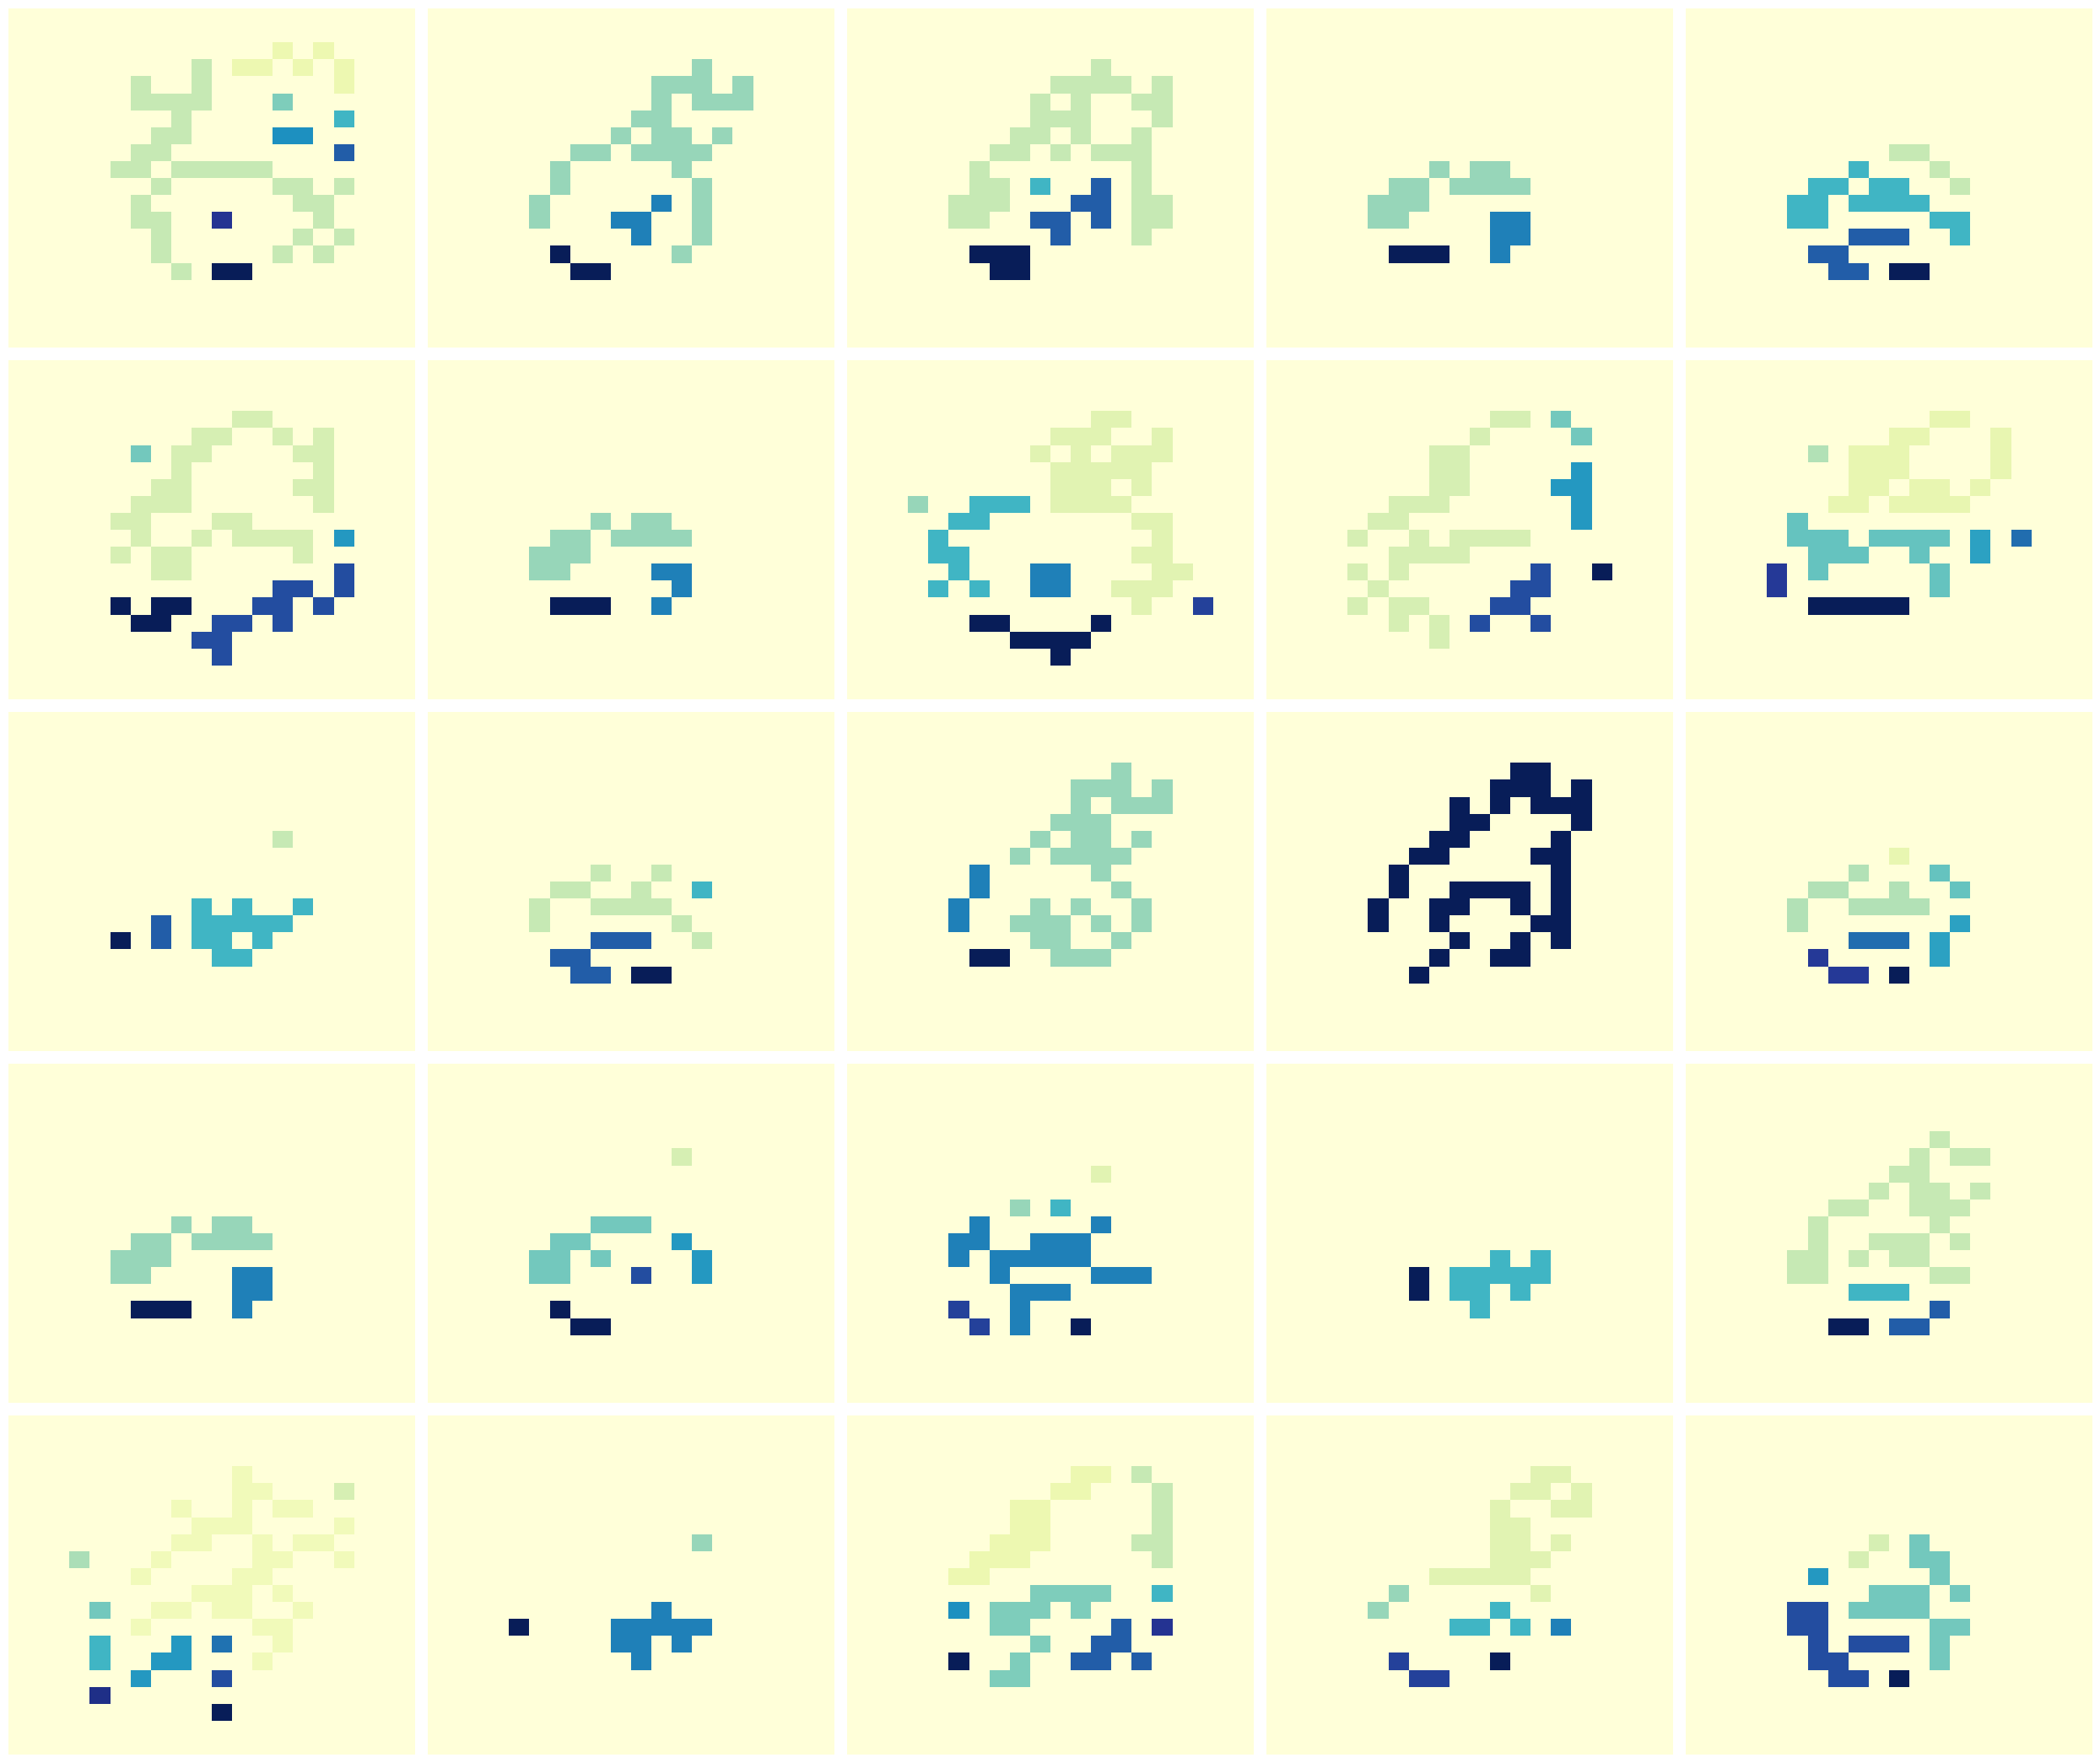

In [4]:
fig, axes = plt.subplots(5,5, figsize=(25,21))
axes = axes.flatten()

for i in range(25):

    sns.heatmap(maps_not_9[i]["map"], annot=False, cmap="YlGnBu", cbar=False, ax=axes[i], linewidths=0)
    # axes[i].set_title(tags[i], fontsize=24)

    axes[i].axis("off")

    
    # print(tags[i])
plt.tight_layout()
plt.show()

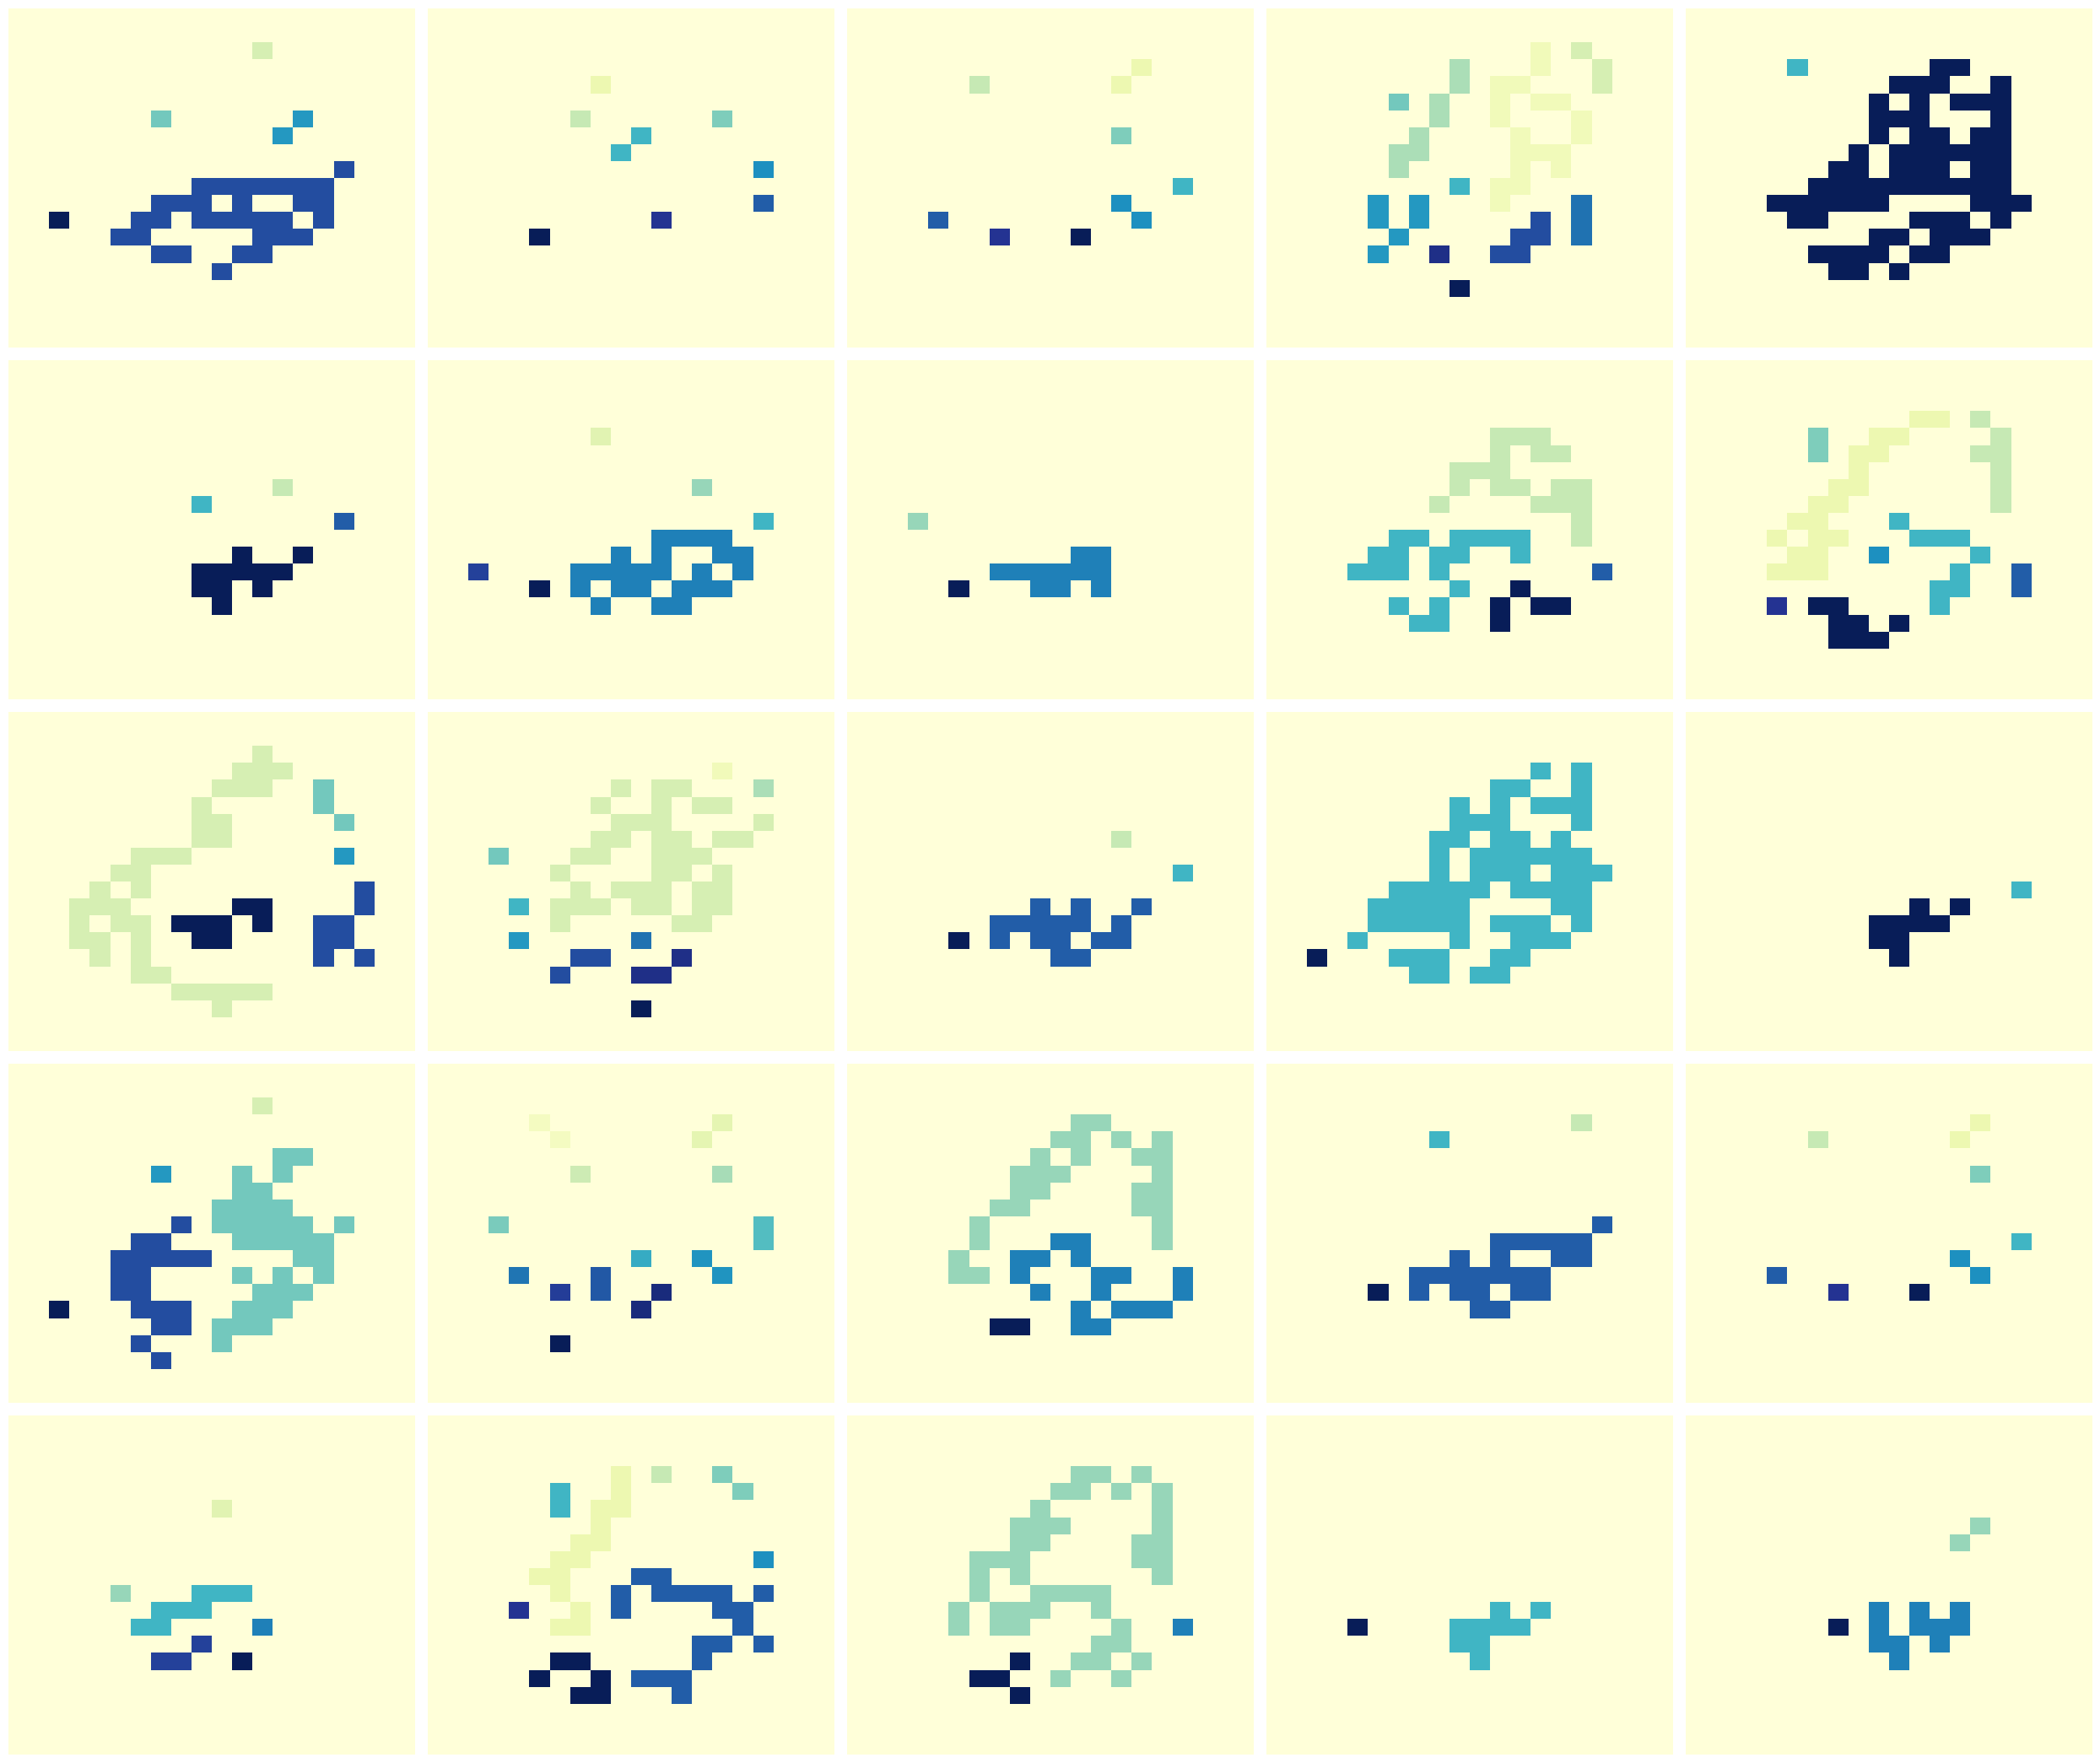

In [81]:
fig, axes = plt.subplots(5,5, figsize=(25,21))
axes = axes.flatten()

for i in range(25):

    sns.heatmap(maps_9[i]["map"], annot=False, cmap="YlGnBu", cbar=False, ax=axes[i], linewidths=0)
    # axes[i].set_title(tags[i], fontsize=24)

    axes[i].axis("off")

    
    # print(tags[i])
plt.tight_layout()
plt.show()

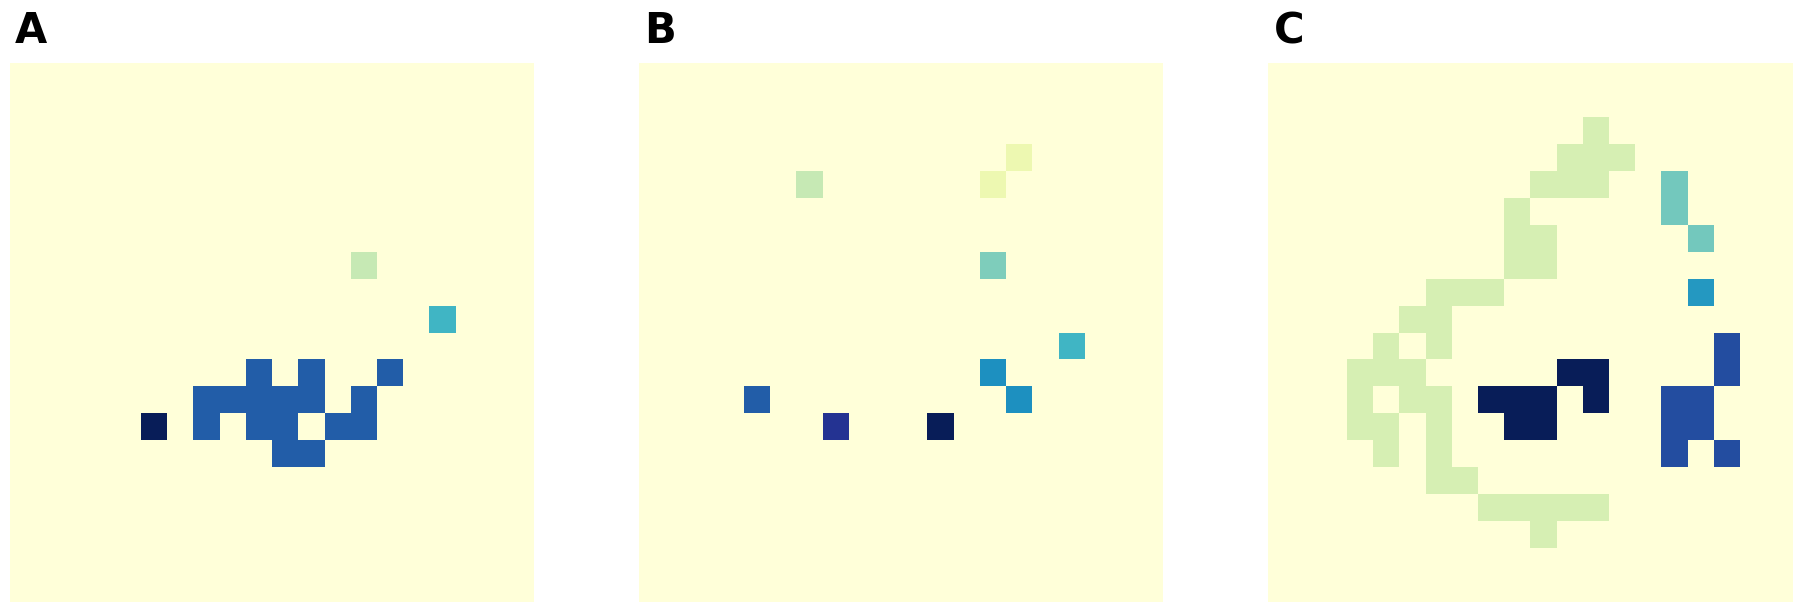

In [103]:
fig, axes = plt.subplots(1,3, figsize=(23,7), gridspec_kw={'hspace':1})
axes = axes.flatten()

sns.heatmap(maps_9[12]["map"], annot=False, cmap="YlGnBu", cbar=False, ax=axes[0], linewidths=0)
sns.heatmap(maps_9[2]["map"], annot=False, cmap="YlGnBu", cbar=False, ax=axes[1], linewidths=0)
sns.heatmap(maps_9[10]["map"], annot=False, cmap="YlGnBu", cbar=False, ax=axes[2], linewidths=0)



axes[0].axis("off")
axes[1].axis("off")
axes[2].axis("off")

labels = ['A', 'B', 'C']
x_label_pos = 0.07  # negative to move slightly left of y-axis
y_label_pos = 1.1   # slightly above the top of the axes

for ax, label in zip([axes[0], axes[1], axes[2]], labels):
    ax.text(
        x_label_pos, y_label_pos,
        label,
        transform=ax.transAxes,  # axes-relative coordinates
        fontsize=30,
        fontweight='bold',
        va='top', ha='right'
    )

plt.savefig("plots/blobs.png", dpi= 300)
# plt.tight_layout()
plt.show()

In [27]:
len(zero_idx)

31

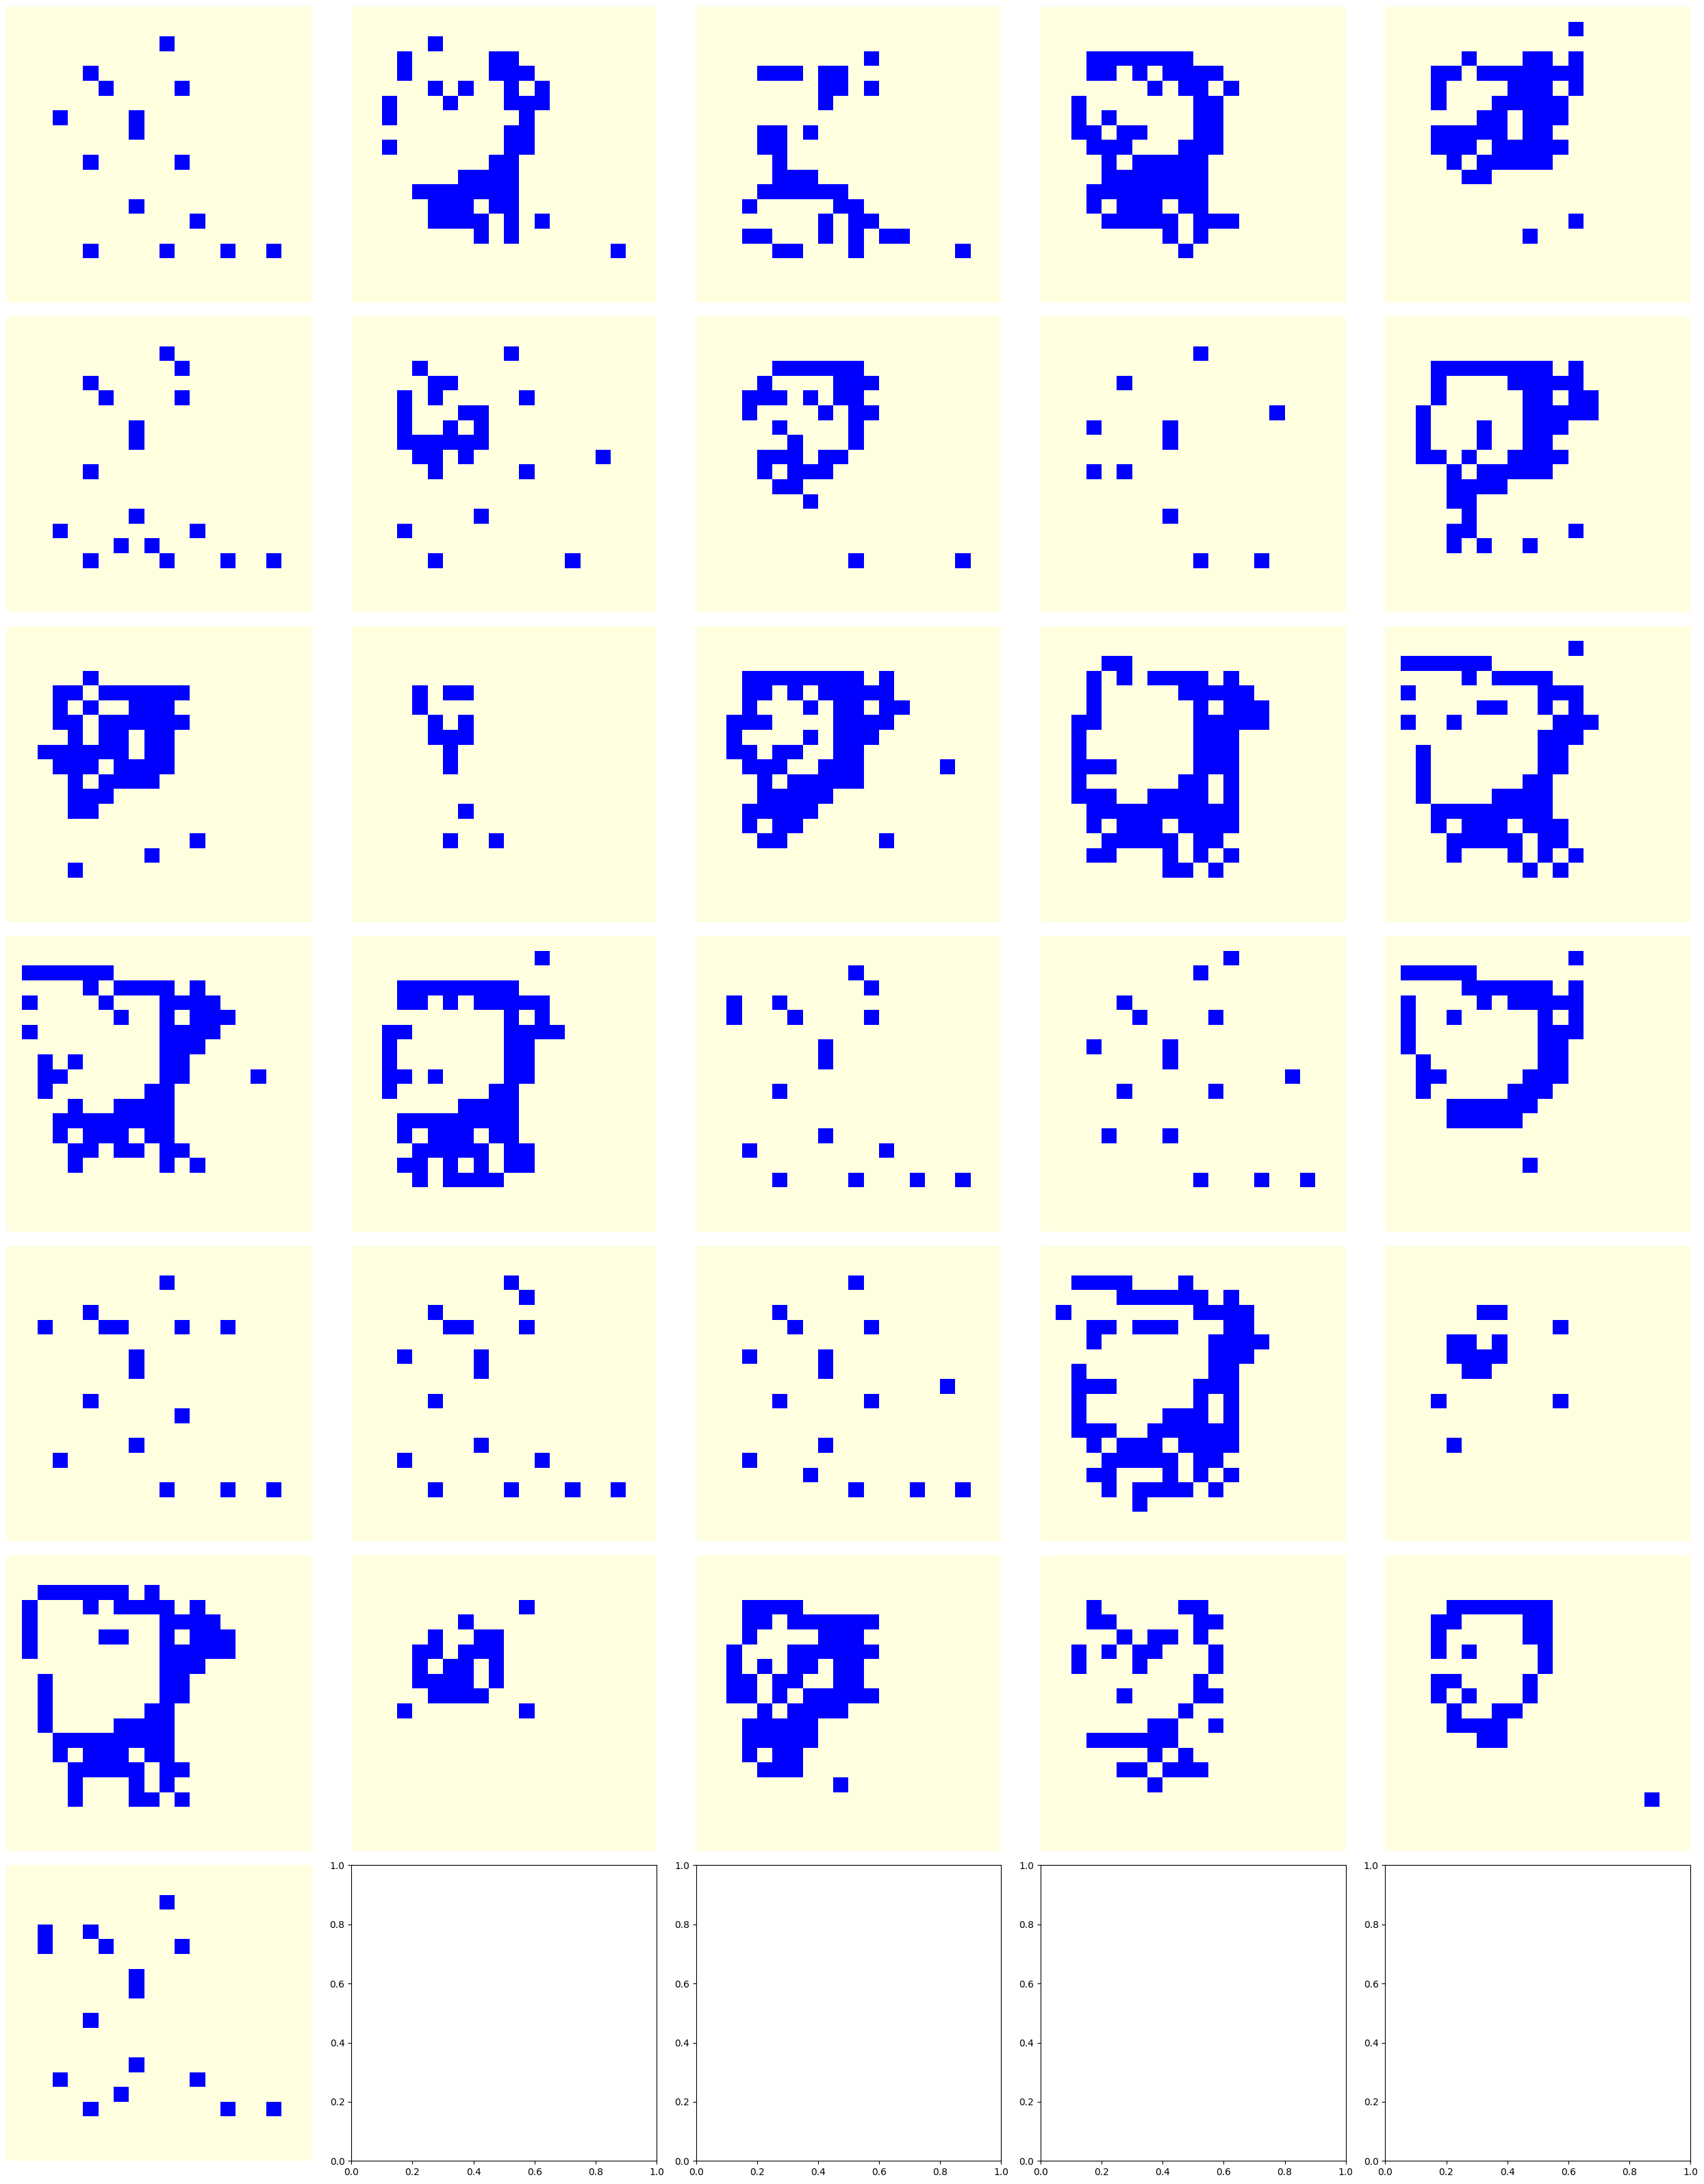

In [41]:
fig, axes = plt.subplots(7,5, figsize=(25,32))
axes = axes.flatten()

for i in range(zero_idx.shape[0]):
    # binary map
    binary_map = (maps[zero_idx[i]]["map"] > 0).astype(int)
    sns.heatmap(binary_map, annot=False, cmap=["#FFFFE0", "blue"], cbar=False, ax=axes[i], linewidths=0)

    # sns.heatmap(maps[zero_idx[i]]["map"], annot=False, cmap="YlGnBu", cbar=False, ax=axes[i], linewidths=0)
    # axes[i].set_title(tags[i], fontsize=24)

    axes[i].axis("off")

    
    # print(tags[i])
plt.tight_layout()
plt.show()

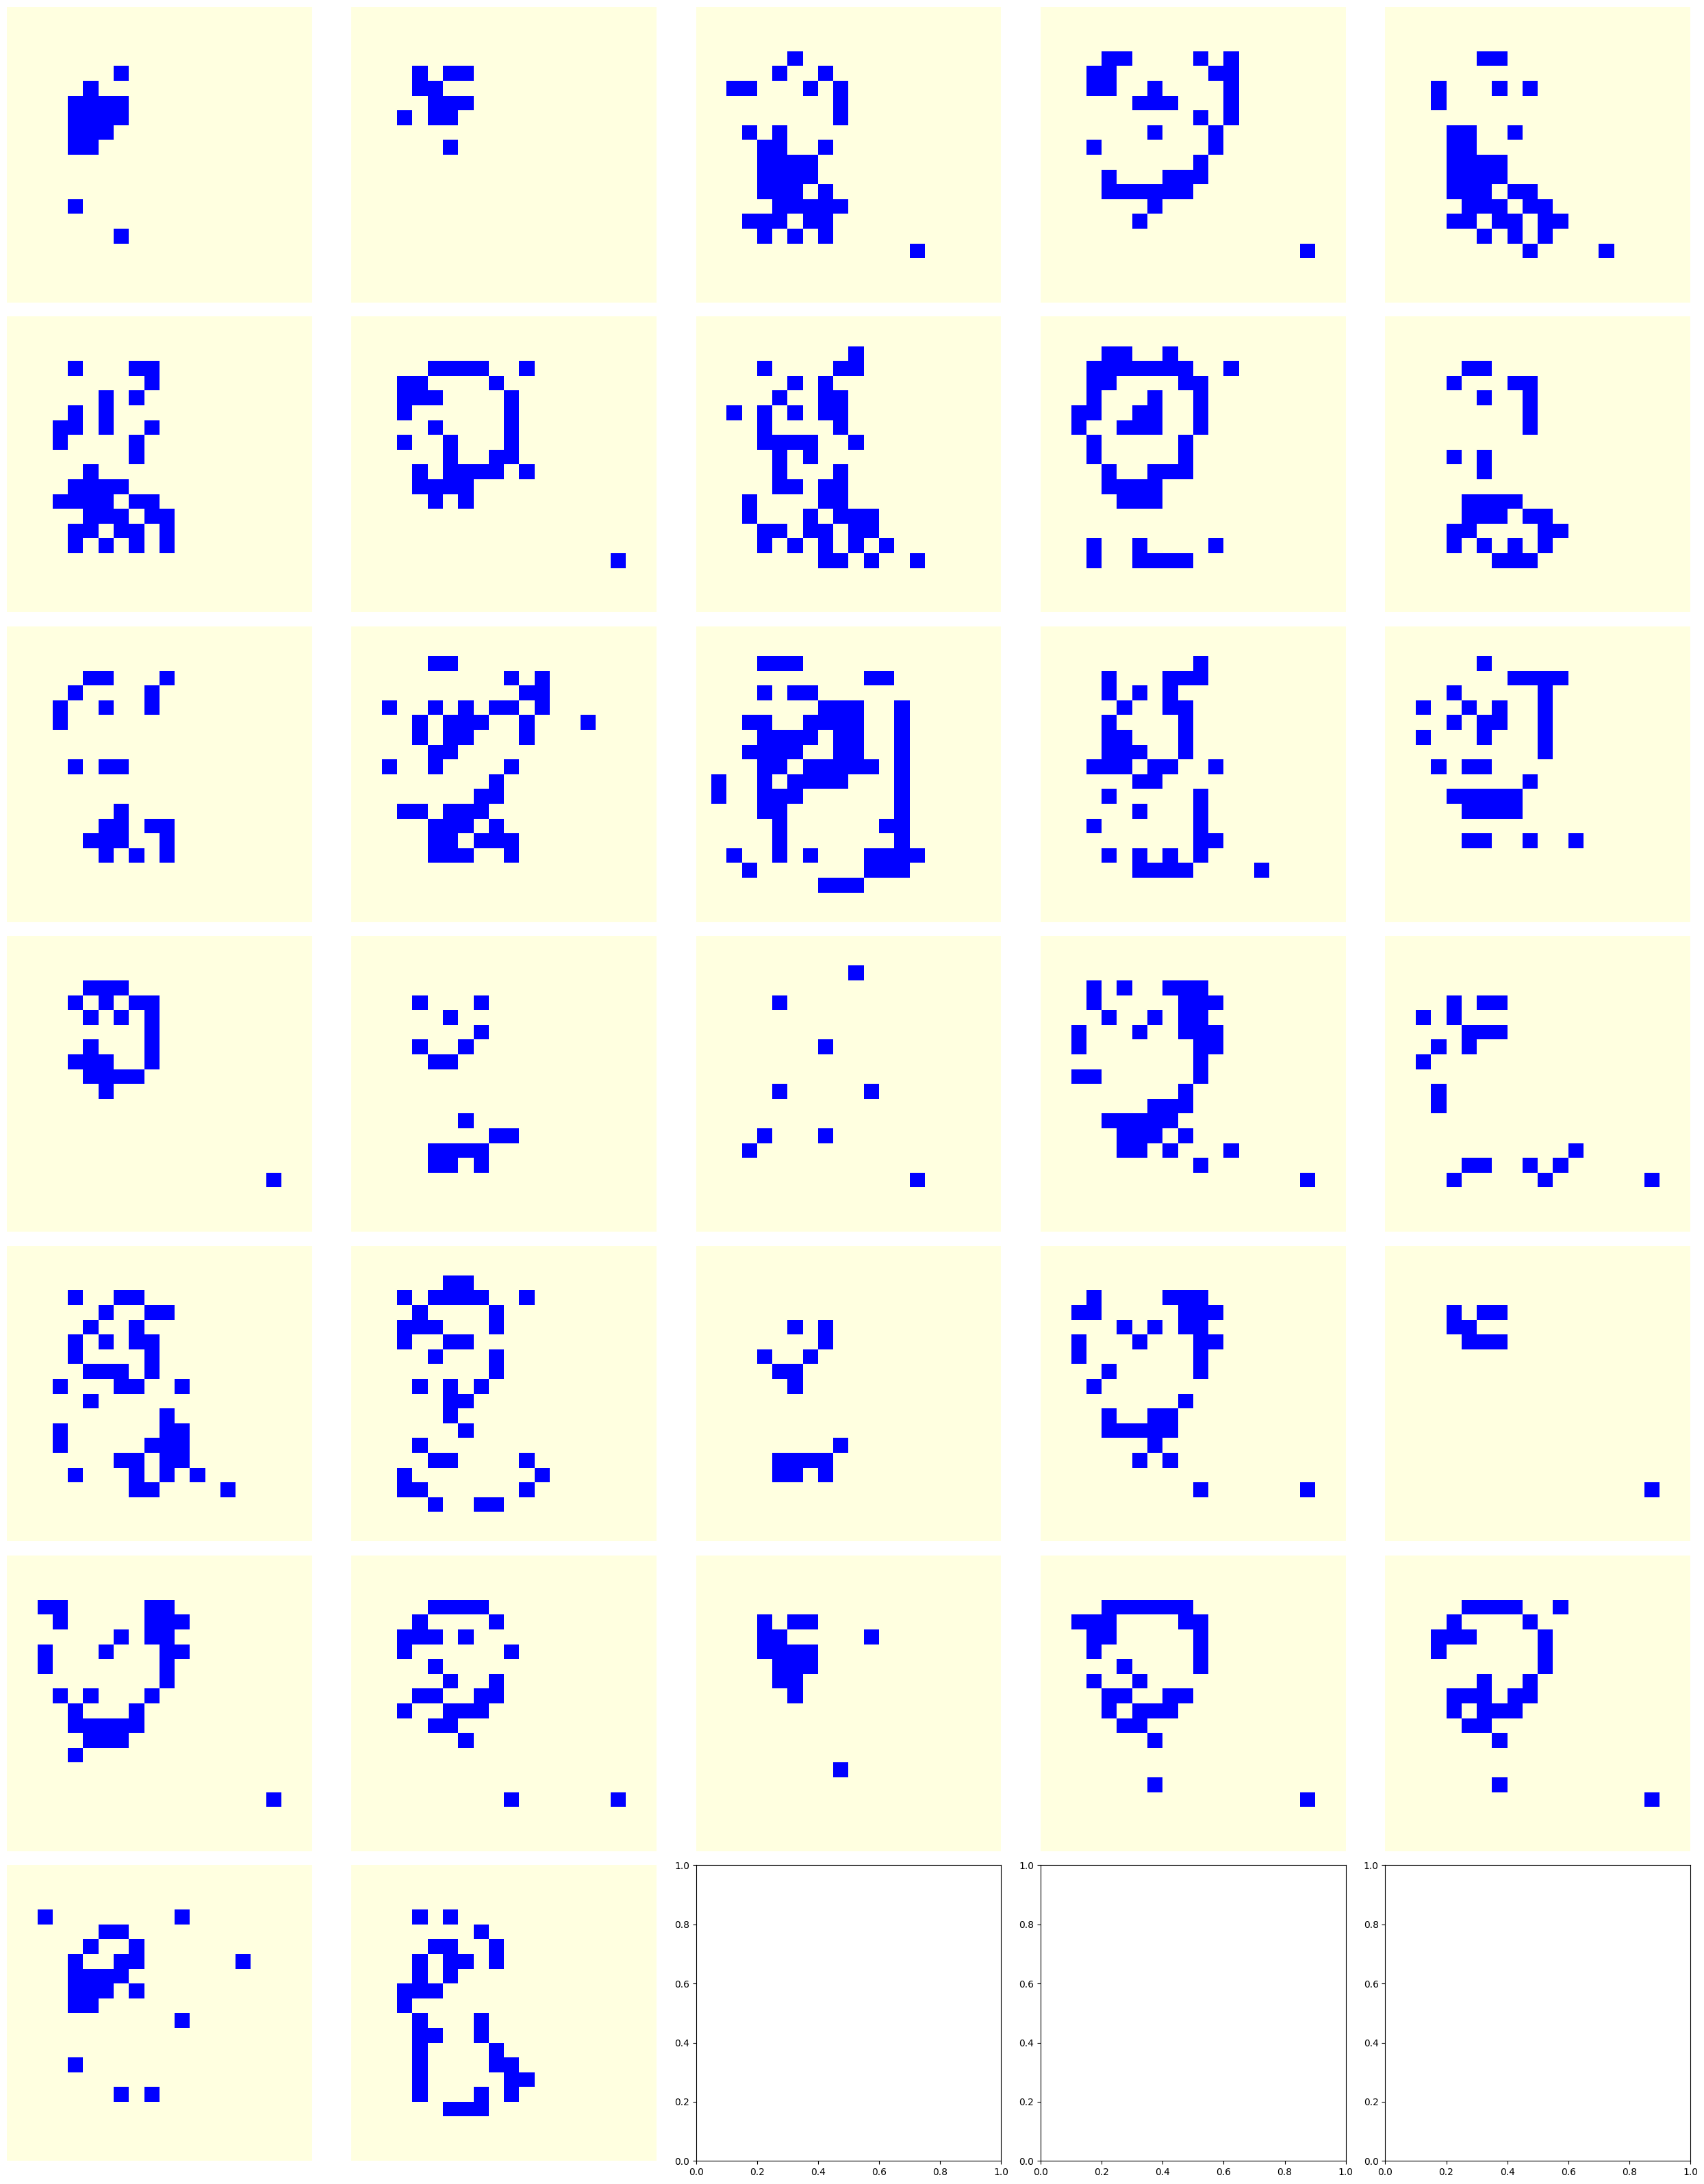

In [42]:
fig, axes = plt.subplots(7,5, figsize=(25,32))
axes = axes.flatten()

for i in range(three_idx.shape[0]):
    # binary map
    binary_map = (maps[three_idx[i]]["map"] > 0).astype(int)
    sns.heatmap(binary_map, annot=False, cmap=["#FFFFE0", "blue"], cbar=False, ax=axes[i], linewidths=0)

    # sns.heatmap(maps[three_idx[i]]["map"], annot=False, cmap="YlGnBu", cbar=False, ax=axes[i], linewidths=0)
    # axes[i].set_title(tags[i], fontsize=24)

    axes[i].axis("off")

    
    # print(tags[i])
plt.tight_layout()
plt.show()

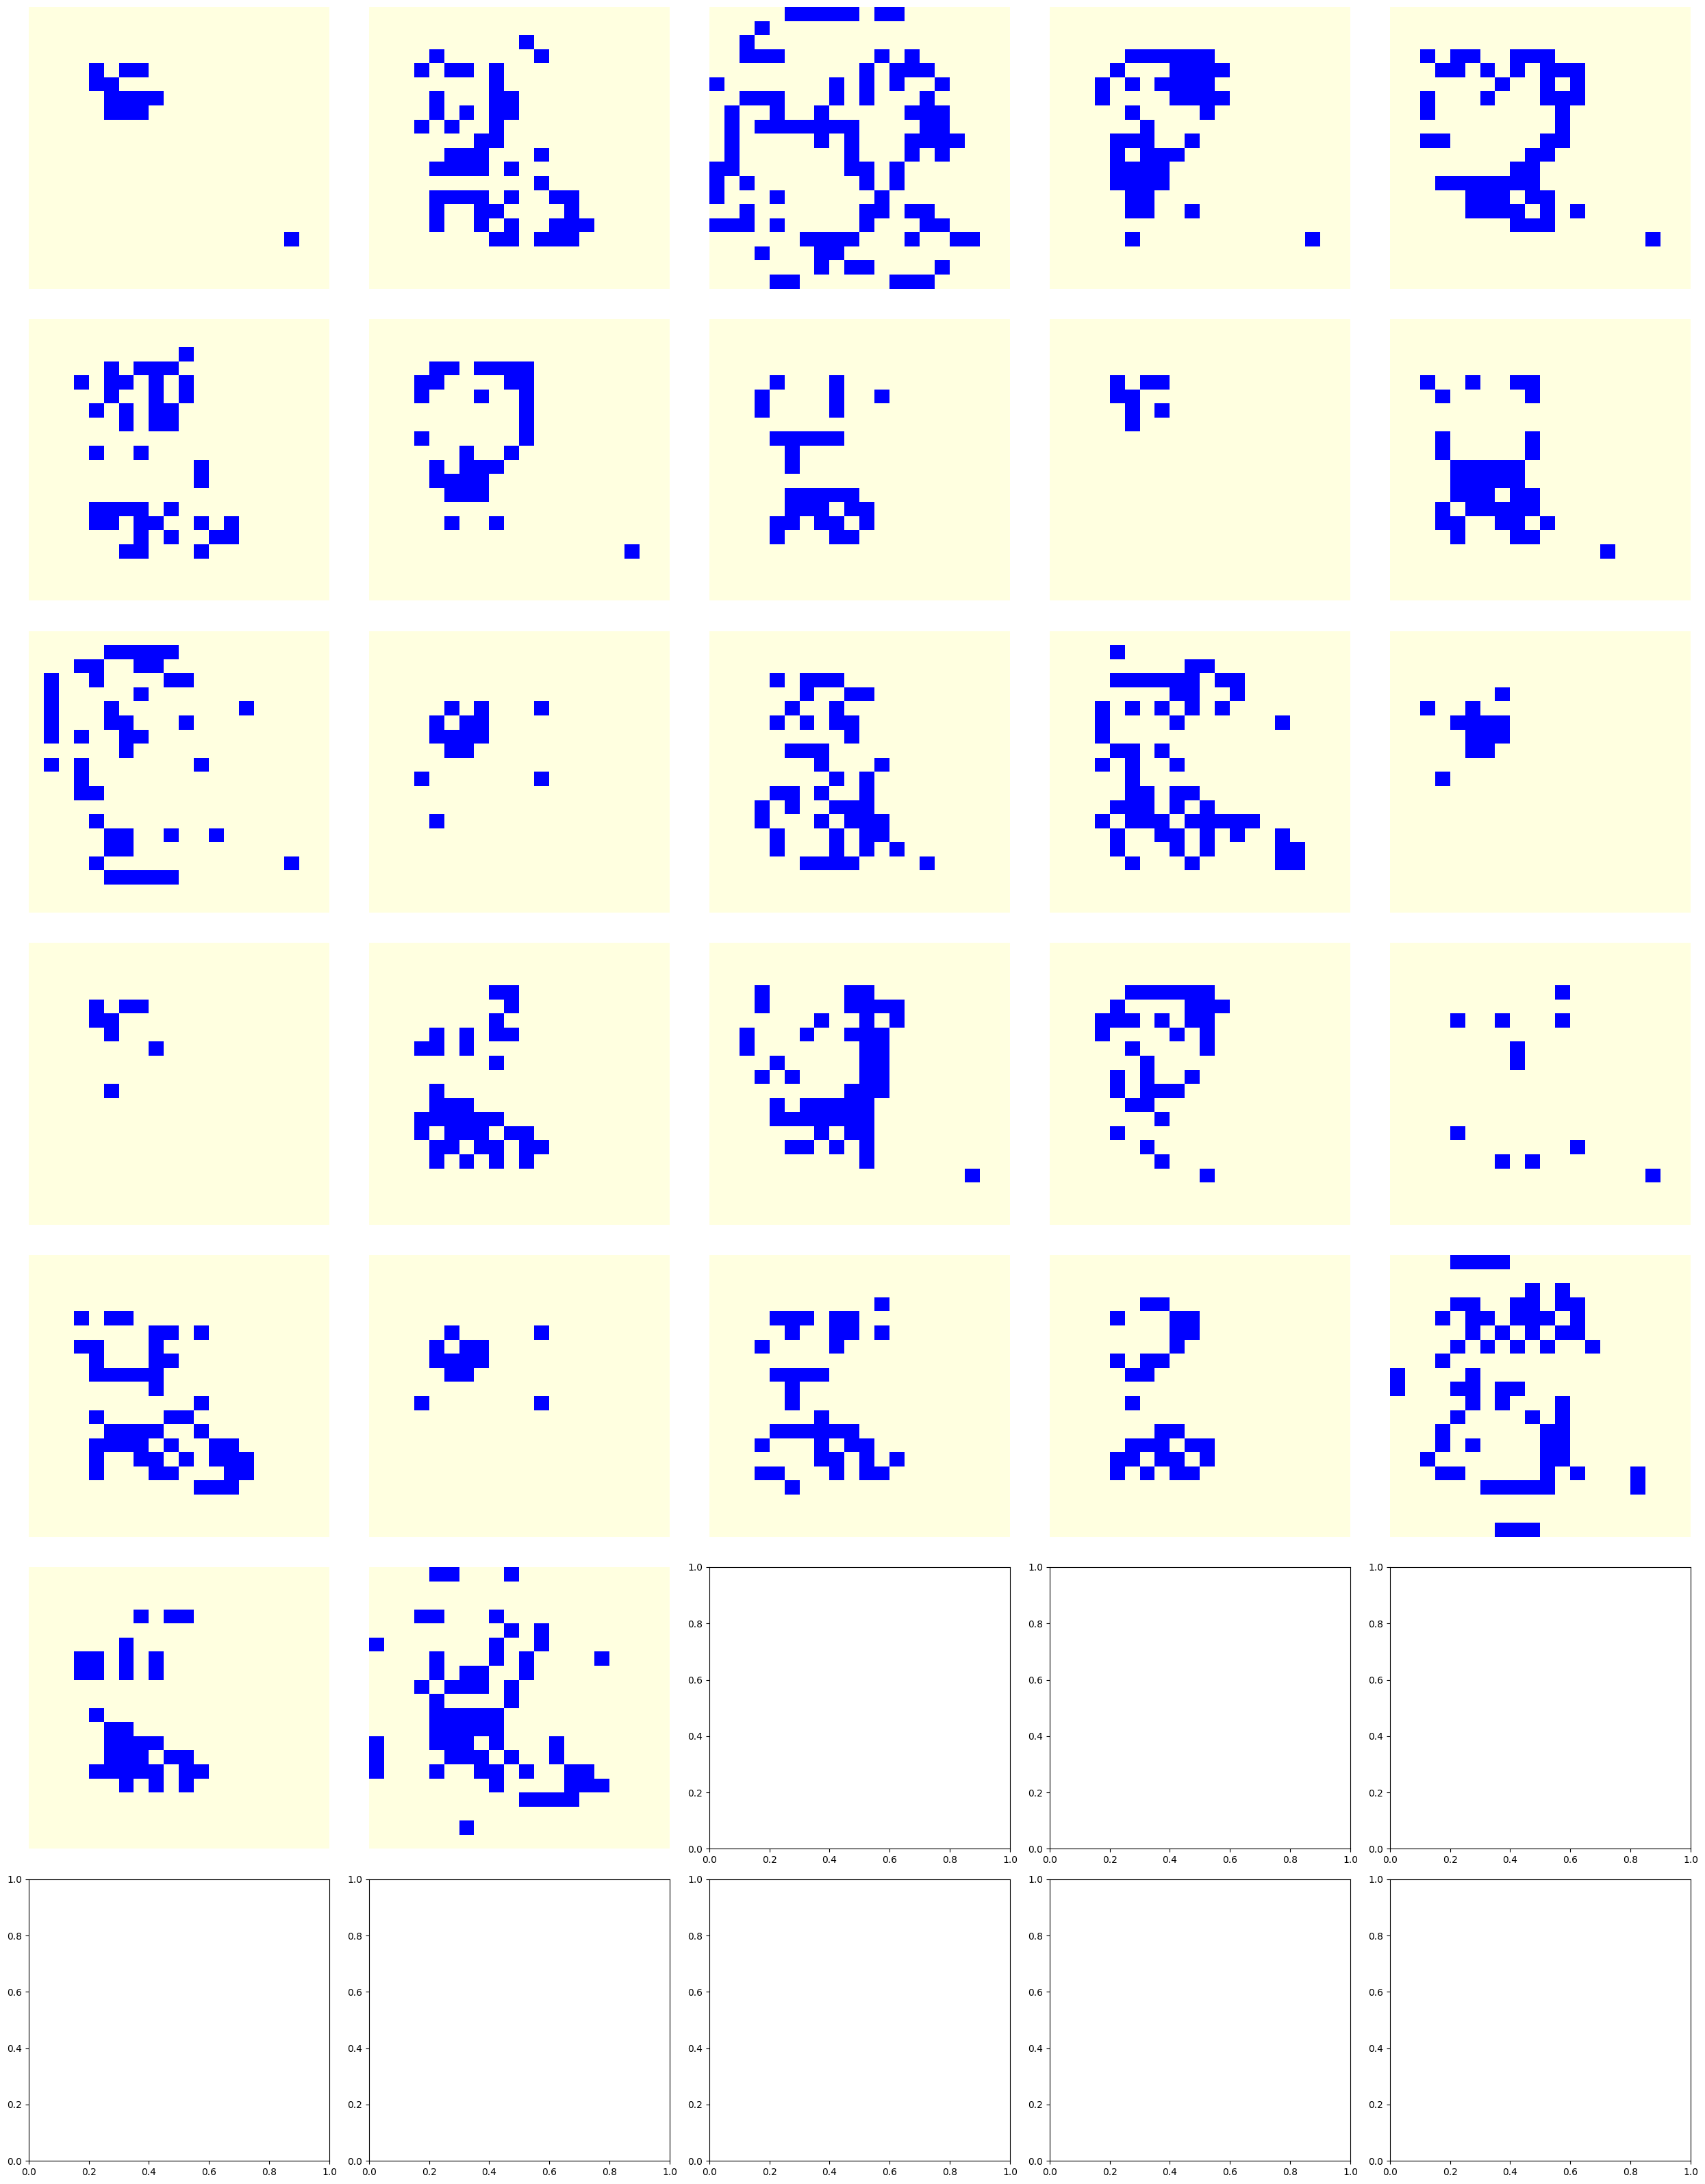

In [46]:
fig, axes = plt.subplots(7,5, figsize=(25,32))
axes = axes.flatten()

for i in range(nine_idx.shape[0]):
    # binary map
    binary_map = (maps[nine_idx[i]]["map"] > 0).astype(int)
    sns.heatmap(binary_map, annot=False, cmap=["#FFFFE0", "blue"], cbar=False, ax=axes[i], linewidths=0)

    # sns.heatmap(maps[five_idx[i]]["map"], annot=False, cmap="YlGnBu", cbar=False, ax=axes[i], linewidths=0)
    # axes[i].set_title(tags[i], fontsize=24)

    axes[i].axis("off")

    
    # print(tags[i])
plt.tight_layout()
plt.show()

In [62]:
for i in nine_maps:
    # temp = i[15:18,5:15]
    temp = i
    temp = (temp != 0).astype(int)
    temp_sum = temp.sum()
    print(temp_sum)

51
28
80
9
83
22
46
49
45
55


In [63]:
for i in zero_maps:
    # temp = i[15:18,5:15]
    temp = i
    temp = (temp != 0).astype(int)
    temp_sum = temp.sum()
    print(temp_sum)

33
21
111
25
88
20
71
57
23
60
14
97
15
24
92
22


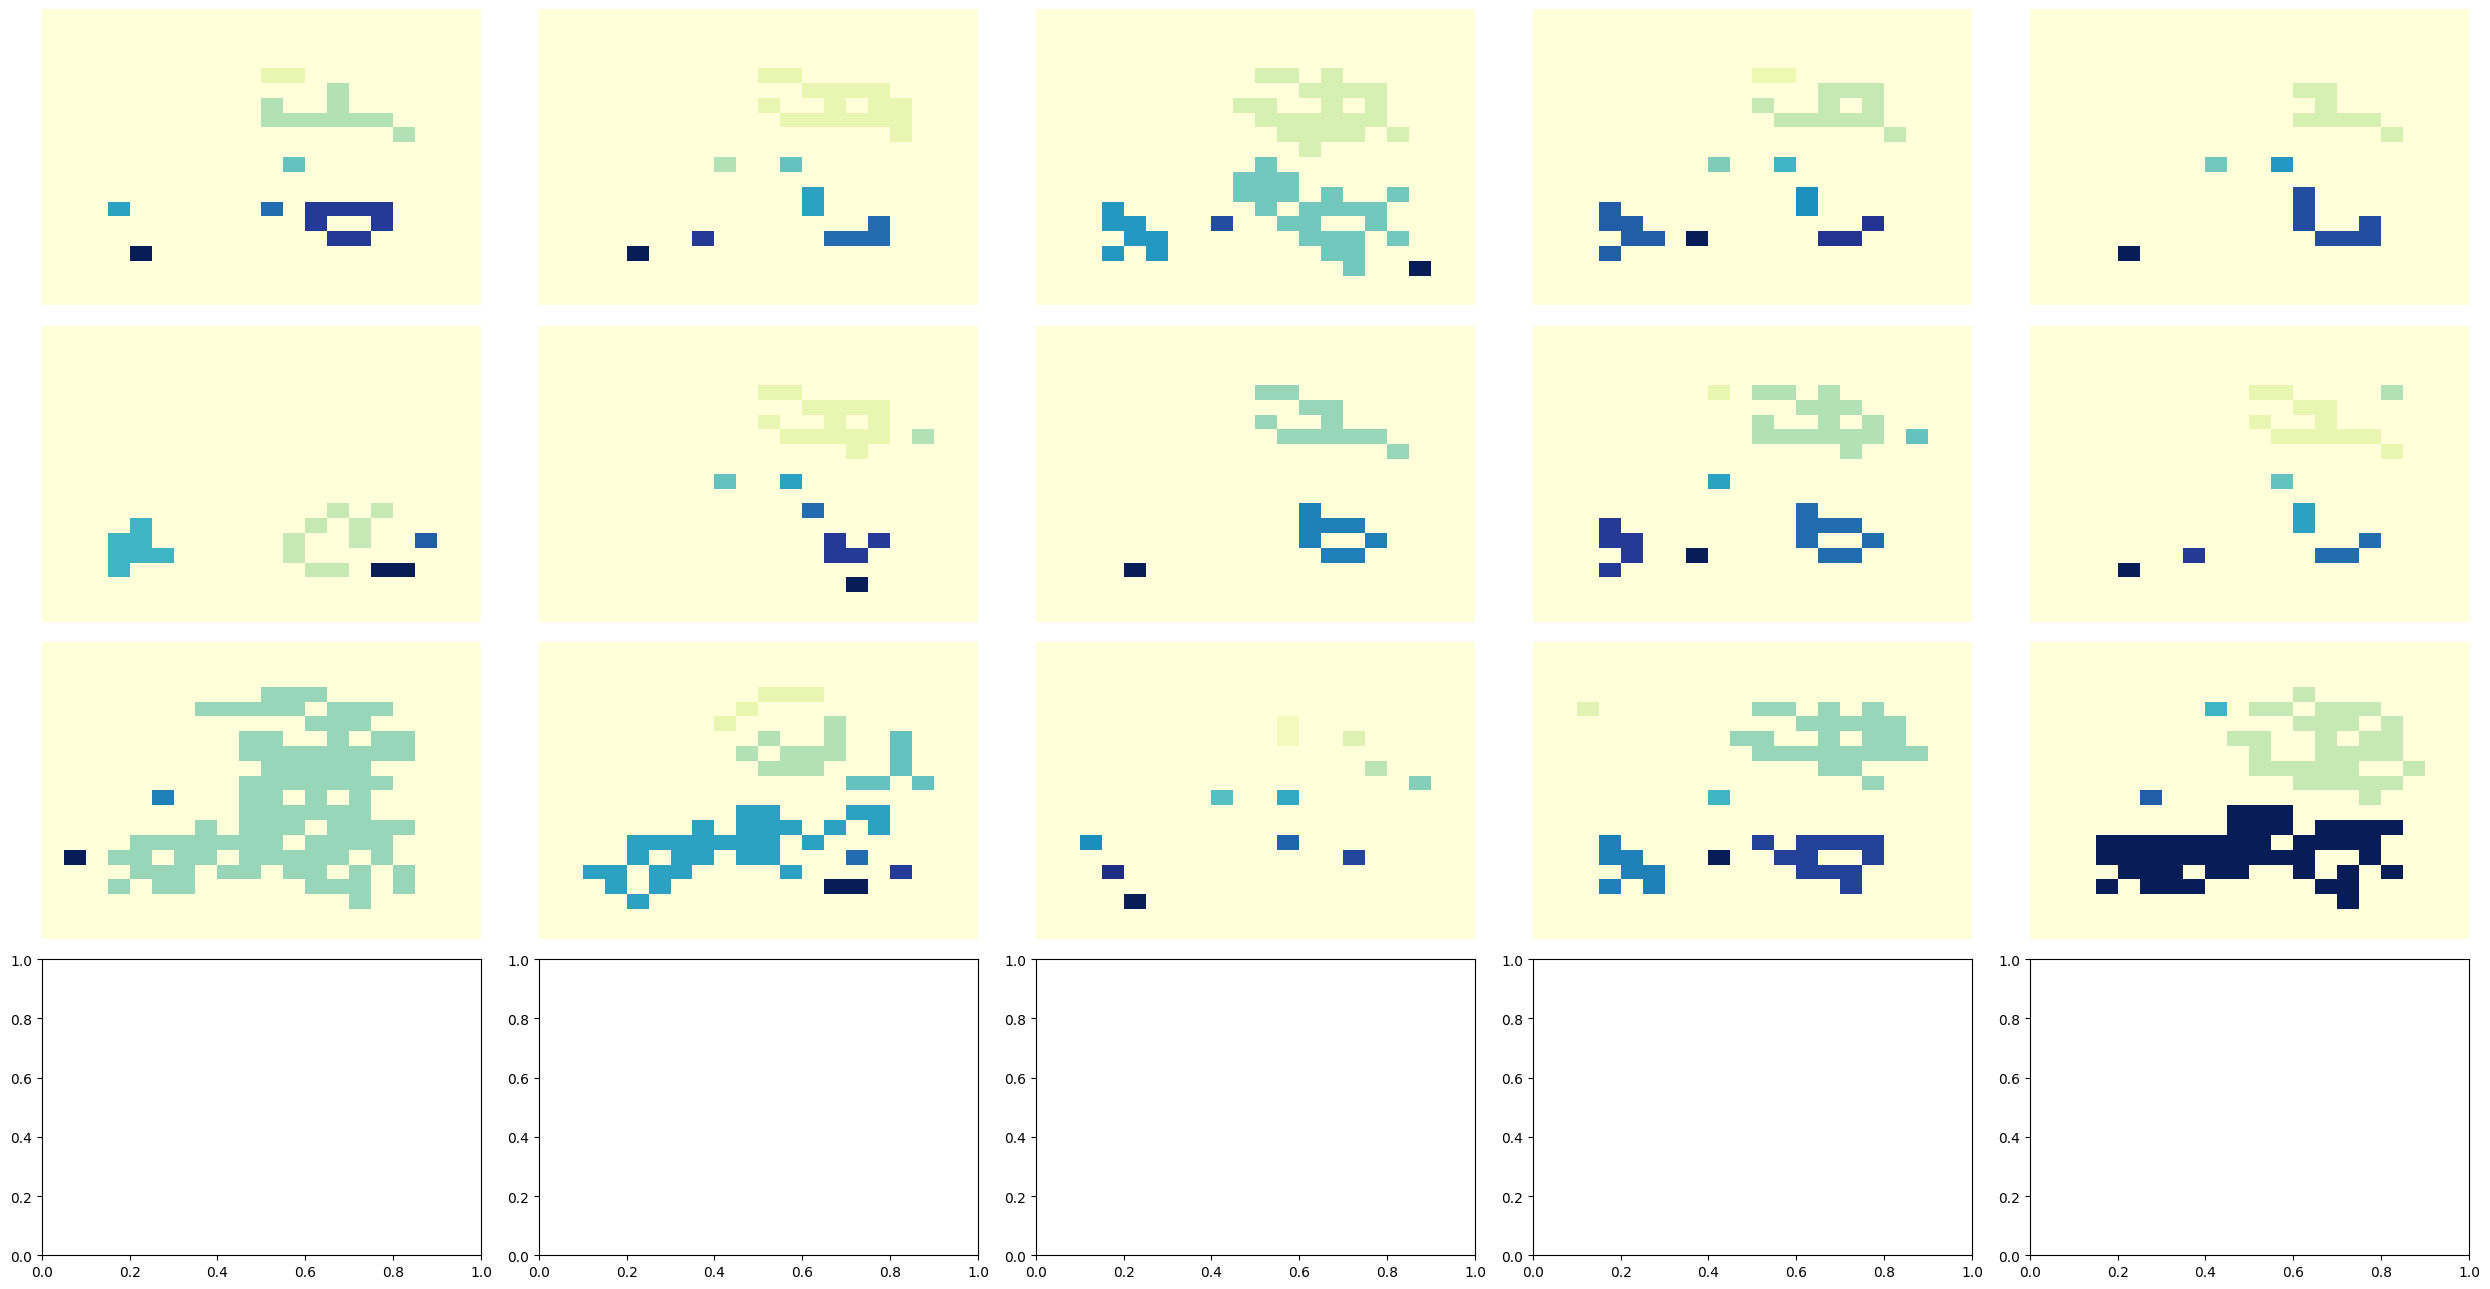

In [24]:
fig, axes = plt.subplots(4,5, figsize=(25,13))
axes = axes.flatten()

for i in range(zero_idx.shape[0]):

    sns.heatmap(maps[zero_idx[i]]["map"], annot=False, cmap="YlGnBu", cbar=False, ax=axes[i], linewidths=0)
    # axes[i].set_title(tags[i], fontsize=24)

    axes[i].axis("off")

    
    # print(tags[i])
plt.tight_layout()
plt.show()

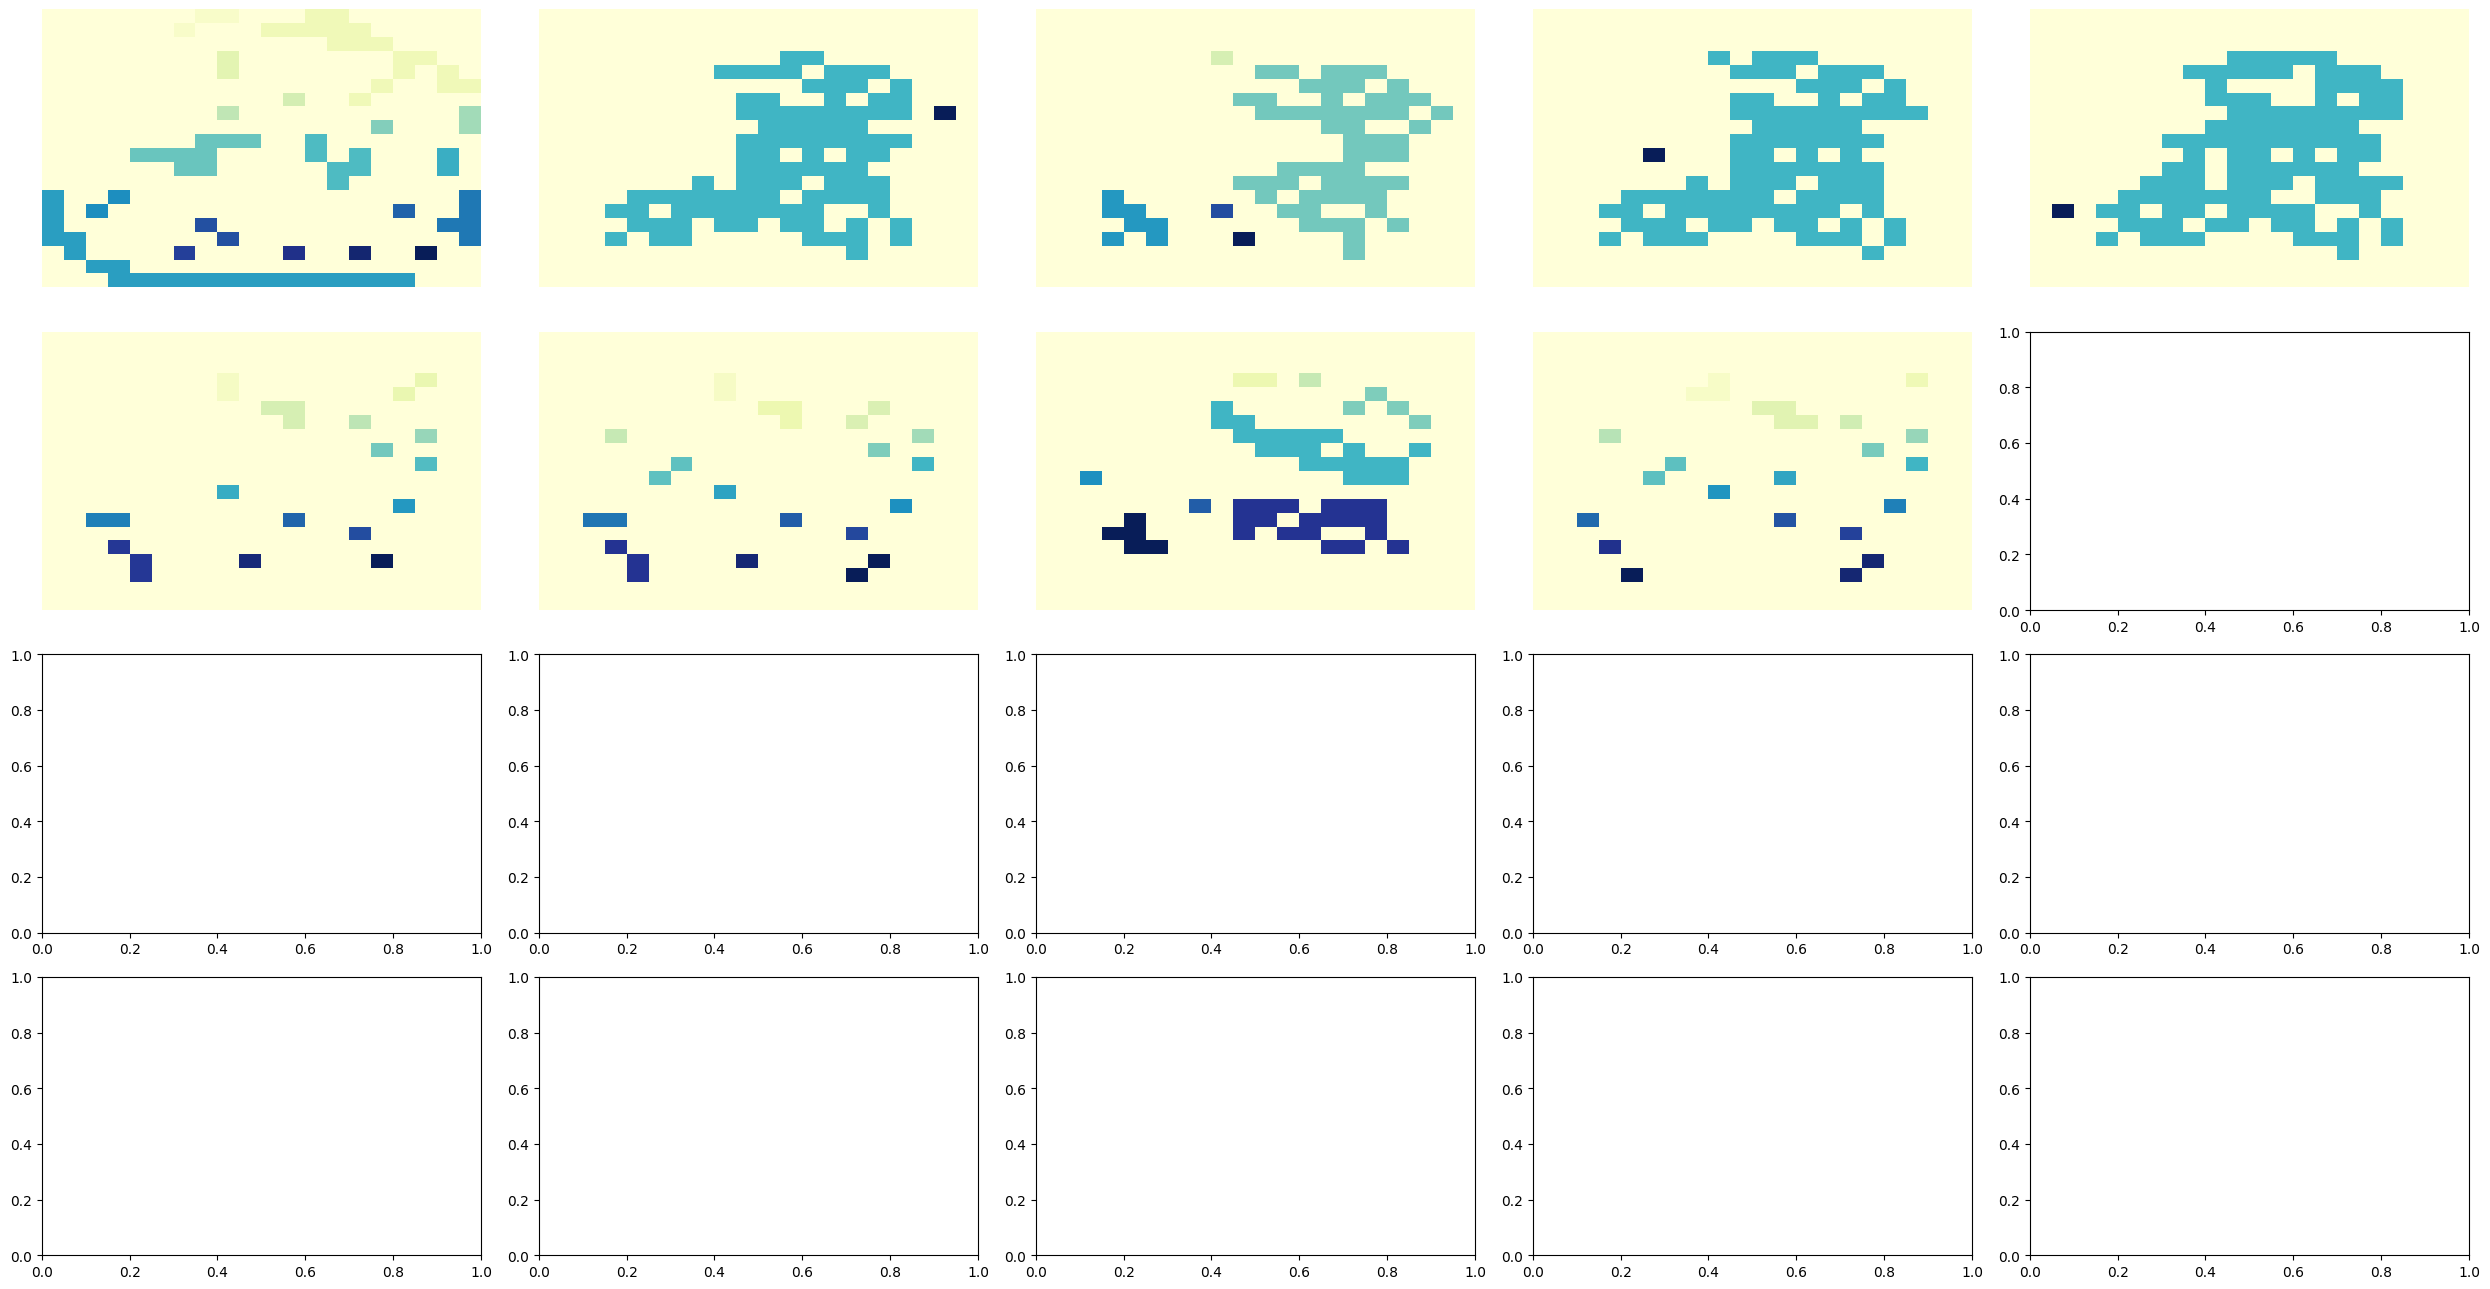

In [25]:
fig, axes = plt.subplots(4,5, figsize=(25,13))
axes = axes.flatten()

for i in range(seven_idx.shape[0]):

    sns.heatmap(maps[seven_idx[i]]["map"], annot=False, cmap="YlGnBu", cbar=False, ax=axes[i], linewidths=0)
    # axes[i].set_title(tags[i], fontsize=24)

    axes[i].axis("off")

    
    # print(tags[i])
plt.tight_layout()
plt.show()

In [44]:
maps[14]

{'sum_E': tensor([  0.,   0.,   0.,  ..., 114., 110., 109.]),
 'first_peak_index': np.int64(1720),
 'map': array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0],
        [0, 0, 0, 0, 4, 0, 0, 2, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 6, 6, 6, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 4, 0, 4, 4, 0, 0, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 4, 0, 0, 0, 0, 6, 0, 0, 6, 0, 0, 0, 

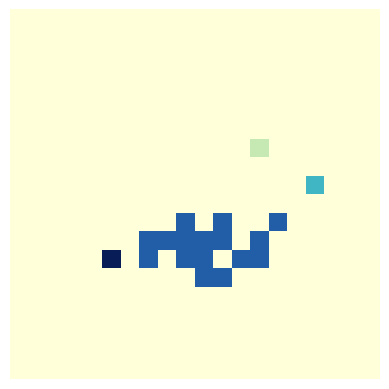

In [79]:
sns.heatmap(maps_9[12]["map"], annot=False, cmap="YlGnBu", cbar=False, xticklabels=False, yticklabels=False,
            square=True)
plt.savefig("plots/blobs.png", dpi= 300)
